In [1]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import matplotlib.style as style
import scipy.stats as stats
import seaborn as sns
%matplotlib inline
style.use('bmh') ## style for charts

from pandas.plotting import scatter_matrix

In [2]:
## from: https://www2.1010data.com/documentationcenter/prod/Tutorials/MachineLearningExamples/CensusIncomeDataSet.html
header_names = [
    'age',
    'class_worker',
    'det_ind_code',
    'det_occ_code',
    'education',
    'wage_per_hour',
    'hs_college',
    'marital_stat',
    'major_ind_code',
    'major_occ_code',
    'race',
    'hisp_origin',
    'sex',
    'union_member',
    'unemp_reason',
    'full_or_part_emp',
    'capital_gains',
    'capital_losses',
    'stock_dividends',
    'tax_filer_stat',
    'region_prev_res',
    'state_prev_res',
    'det_hh_fam_stat',
    'det_hh_summ',
    'instance_weight', ## this field is not used as a feature
    'mig_chg_msa',
    'mig_chg_reg',
    'mig_move_reg',
    'mig_same',
    'mig_prev_sunbelt',
    'num_emp',
    'fam_under_18',
    'country_father',
    'country_mother',
    'country_self',
    'citizenship',
    'own_or_self',
    'vet_question',
    'vet_benefits',
    'weeks_worked',
    'year',
    'income_50k',
]

In [3]:
df = pd.read_csv('./input/census-income.data.csv', header=None, names=header_names)
df_test = pd.read_csv('./input/census-income.test.csv', header=None, names=header_names)
df = pd.concat([df,df_test]) ## the test file is also labelled so they can be merged
df.drop(columns=['instance_weight']) ## not used for our analysis
df.shape

(299285, 42)

In [65]:
## Create a new variable for classification based of if the person recieved a degree beyond high school
higer_degrees = [
    ' Bachelors degree(BA AB BS)', 
    ' Masters degree(MA MS MEng MEd MSW MBA)', 
    ' Prof school degree (MD DDS DVM LLB JD)',
    ' Doctorate degree(PhD EdD)',
    ' Associates degree-academic program',
    ' Associates degree-occup /vocational',
]

df['graduated'] = 'no'
df.loc[df['education'].isin(higer_degrees), 'graduated'] = 'yes'

In [85]:
categorical_features = [
    'class_worker',
    'det_ind_code',
    'det_occ_code',
    'education',
    'hs_college',
    'marital_stat',
    'major_ind_code',
    'major_occ_code',
    'race',
    'hisp_origin',
    'sex',
    'union_member',
    'unemp_reason',
    'full_or_part_emp',
    'tax_filer_stat',
    'region_prev_res',
    'state_prev_res',
    'det_hh_fam_stat',
    'det_hh_summ',
    'mig_chg_msa',
    'mig_chg_reg',
    'mig_move_reg',
    'mig_same',
    'mig_prev_sunbelt',
    'fam_under_18',
    'country_father',
    'country_mother',
    'country_self',
    'citizenship',
    'own_or_self',
    'vet_question',
    'vet_benefits',
    'year',
]
continuous_features = [
    'age', 
    'wage_per_hour',
    'capital_gains',
    'capital_losses',
    'stock_dividends',
    'num_emp',
    'weeks_worked',
]

df[categorical_features] = df[categorical_features].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299285 entries, 0 to 99761
Data columns (total 47 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   age                  299285 non-null  int64   
 1   class_worker         299285 non-null  category
 2   det_ind_code         299285 non-null  category
 3   det_occ_code         299285 non-null  category
 4   education            299285 non-null  category
 5   wage_per_hour        299285 non-null  int64   
 6   hs_college           299285 non-null  category
 7   marital_stat         299285 non-null  category
 8   major_ind_code       299285 non-null  category
 9   major_occ_code       299285 non-null  category
 10  race                 299285 non-null  category
 11  hisp_origin          299285 non-null  category
 12  sex                  299285 non-null  category
 13  union_member         299285 non-null  category
 14  unemp_reason         299285 non-null  category
 15  f

In [5]:
df.describe()

age  wage_per_hour  capital_gains  capital_losses  \
count  299285.000000  299285.000000  299285.000000   299285.000000   
mean       34.538998      55.105027     431.742176       36.849010   
std        22.318468     273.340729    4670.768536      269.789771   
min         0.000000       0.000000       0.000000        0.000000   
25%        15.000000       0.000000       0.000000        0.000000   
50%        33.000000       0.000000       0.000000        0.000000   
75%        50.000000       0.000000       0.000000        0.000000   
max        90.000000    9999.000000   99999.000000     4608.000000   

       stock_dividends  instance_weight        num_emp   weeks_worked  
count    299285.000000    299285.000000  299285.000000  299285.000000  
mean        195.851259      1740.101125       1.956172      23.178375  
std        1937.847082       994.144299       2.364857      24.404016  
min           0.000000        37.870000       0.000000       0.000000  
25%           0.000000      1060.490000       0.000000       0.000000  
50%           0.000000      1617.110000       1.000000       8.000000  
75%           0.000000      2188.110000       4.000000      52.000000  
max       99999.000000     18656.300000       6.000000      52.000000

In [6]:
df.describe(include = 'category')

class_worker  det_ind_code  det_occ_code              education  \
count             299285        299285        299285                 299285   
unique                 9            52            47                     17   
top      Not in universe             0             0   High school graduate   
freq              150324        150967        150967                  72554   

              hs_college    marital_stat                major_ind_code  \
count             299285          299285                        299285   
unique                 3               7                            24   
top      Not in universe   Never married   Not in universe or children   
freq              280367          129628                        150967   

          major_occ_code    race hisp_origin  ... mig_prev_sunbelt  \
count             299285  299285      299285  ...           299285   
unique                15       5          10  ...                4   
top      Not in universe   White   All other  ...                ?   
freq              150967  250978      257830  ...           149642   

            fam_under_18  country_father  country_mother    country_self  \
count             299285          299285          299285          299285   
unique                 5              43              43              43   
top      Not in universe   United-States   United-States   United-States   
freq              216626          238531          240492          265342   

                               citizenship own_or_self      vet_question  \
count                               299285      299285            299285   
unique                                   5           3                 3   
top      Native- Born in the United States           0   Not in universe   
freq                                265347      270860            296274   

       vet_benefits    year  
count        299285  299285  
unique            3       2  
top               2      94  
freq         225427  149643  

[4 rows x 33 columns]

In [76]:
def categorical_explanitory_binary_response_chart(chart_df, field, target, toggle=False, ):
    # the toggle switches which class is the "baseline" of the line chart
    drop_index = 2
    if toggle:
        drop_index = 1
    
    field_count  = chart_df[field].value_counts()
    field_count_df = field_count.to_frame()
    field_count_df.columns = ['count']
    
    field_target_pct = pd.crosstab(chart_df[field], chart_df[target], normalize='index') * 100
    field_target_pct = field_target_pct.reset_index()
    field_target_pct = field_target_pct.drop(field_target_pct.columns[-drop_index],axis=1)
    
    field_target_data = field_target_pct.merge(field_count_df, right_index=True, left_on=field).sort_values('count', ascending=False).reset_index(drop=True)
    
    print(field_target_data)
    
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_xlabel(field)
    ax = sns.barplot(field_target_data[field], field_target_data['count'], alpha=0.8)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
    ax.set_ylabel('count (bars)')
    ax2 = ax.twinx()
    ax2 = sns.pointplot(x=field_target_data[field], y=field_target_data.iloc[:, -2], color='black', legend=False)
    ax2.set_ylabel('% {t} (line)'.format(t = target))
    plt.show()
    

<Figure size 720x14256 with 0 Axes>

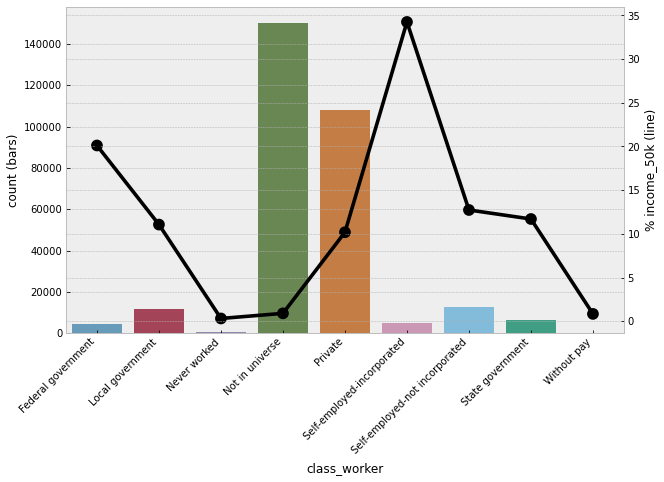

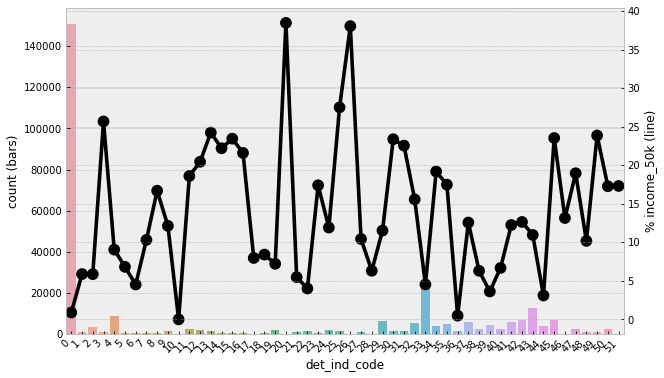

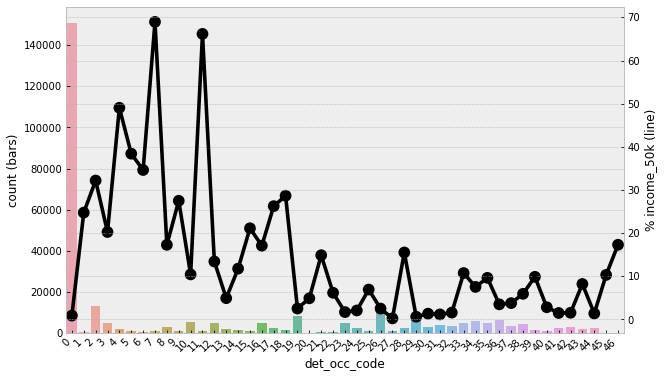

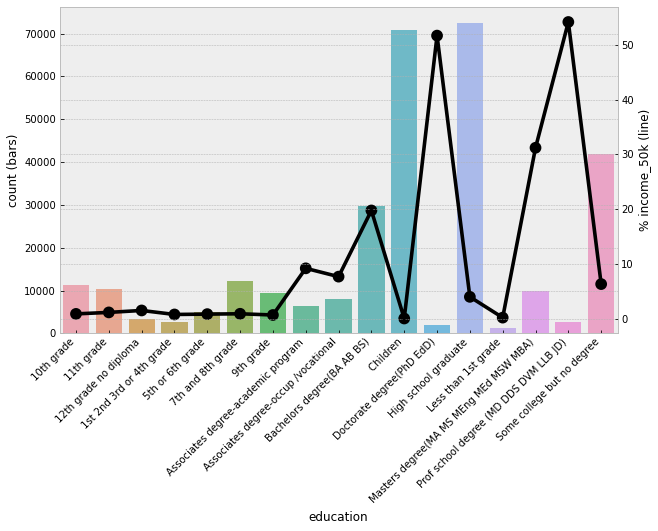

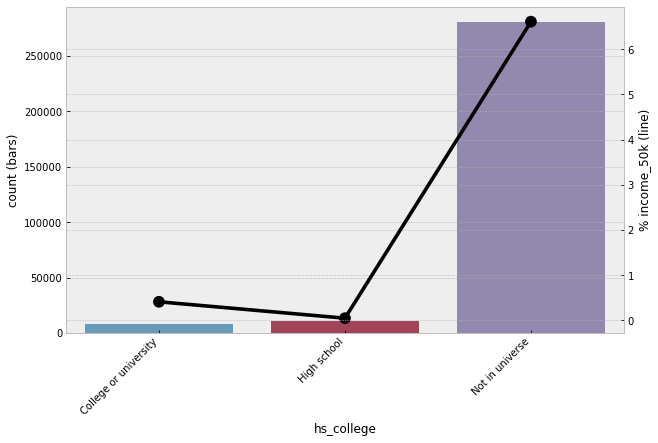

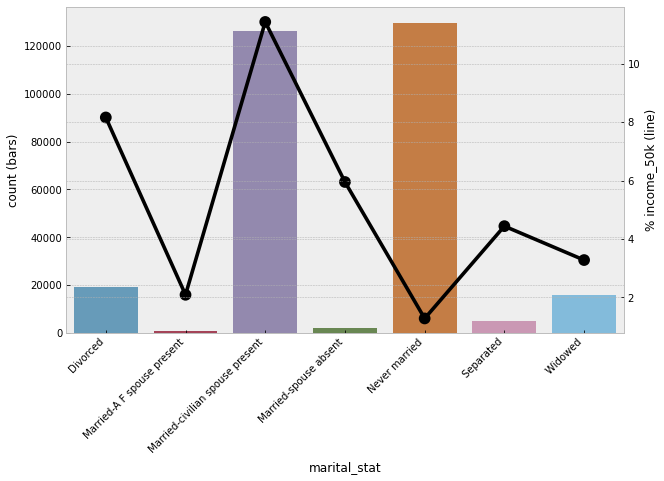

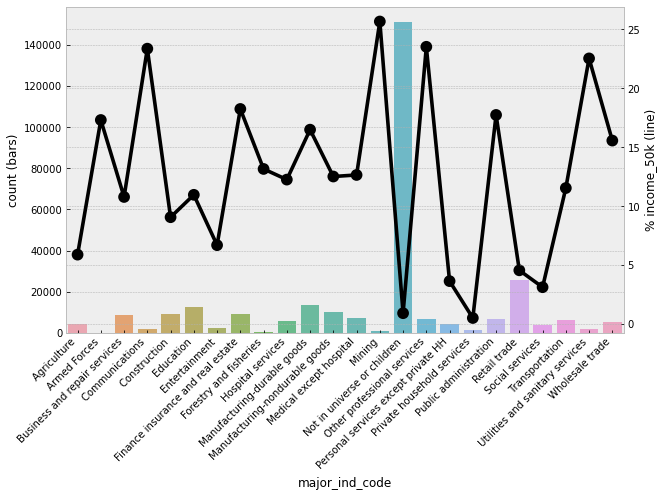

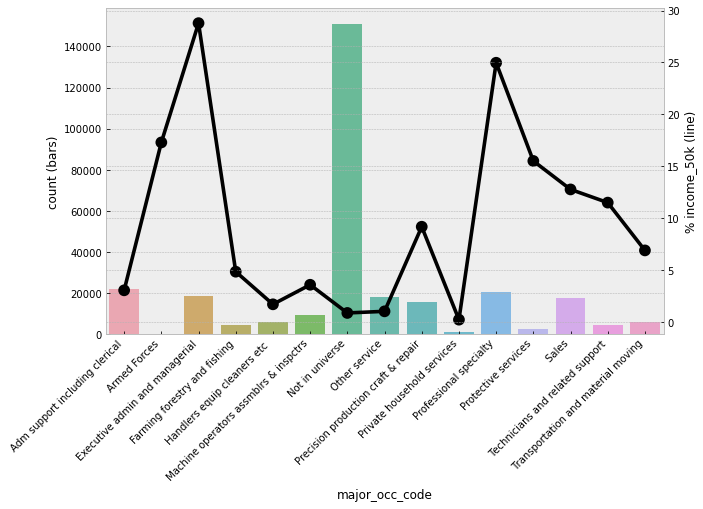

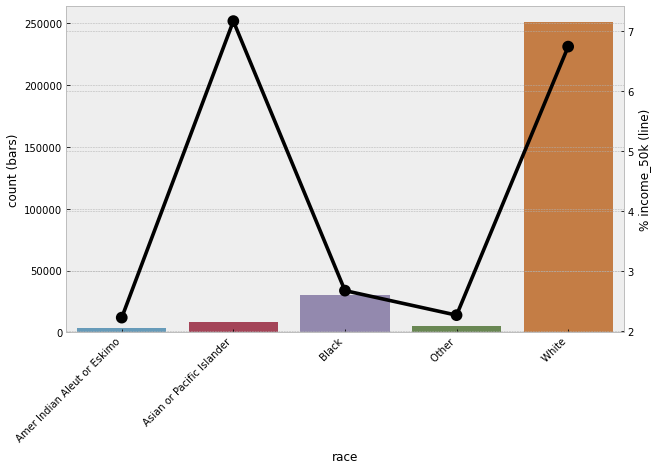

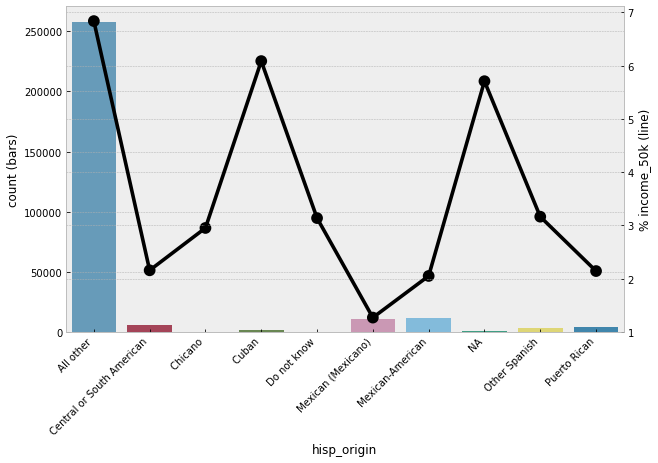

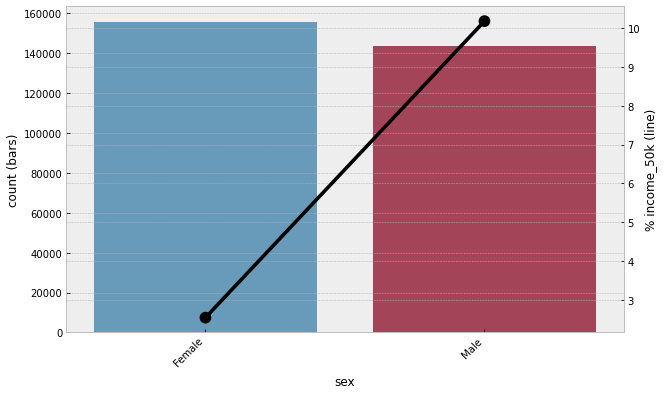

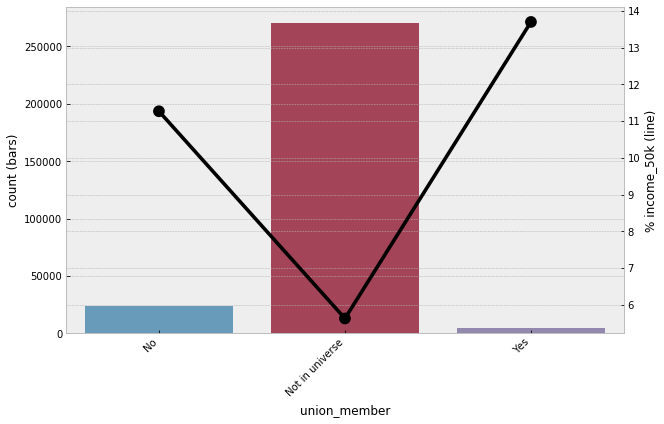

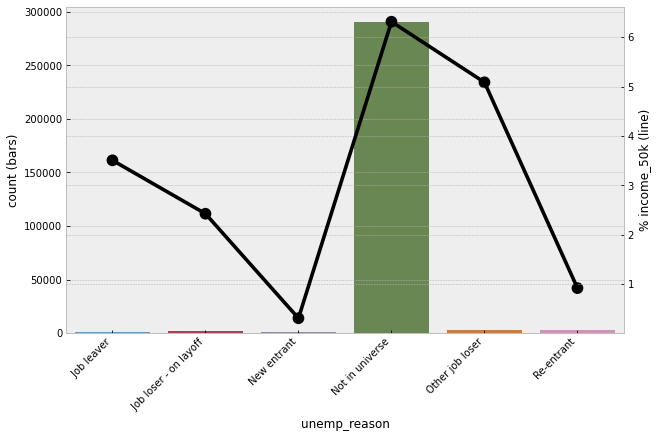

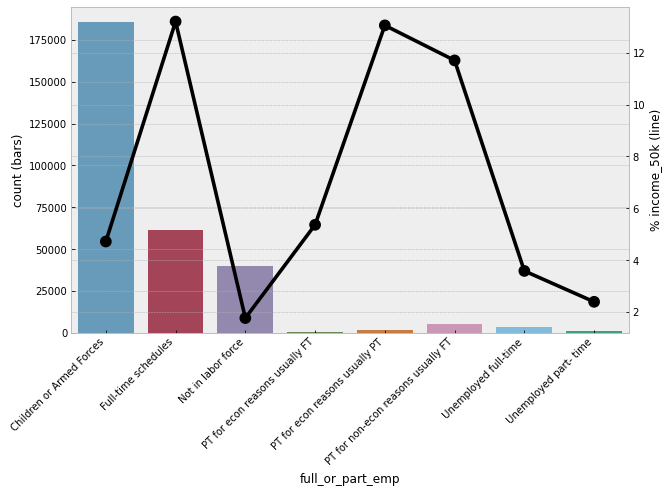

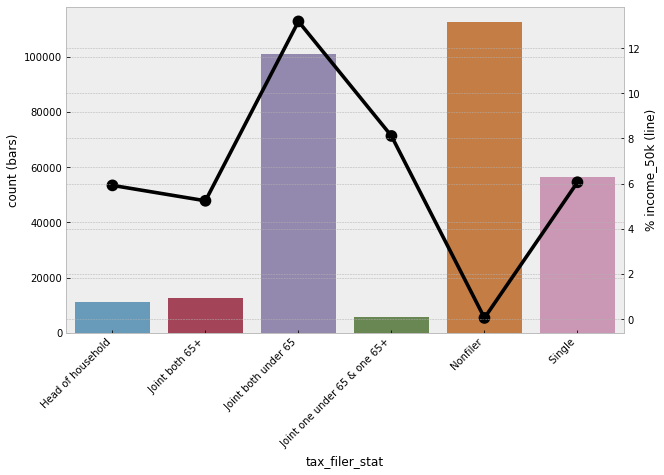

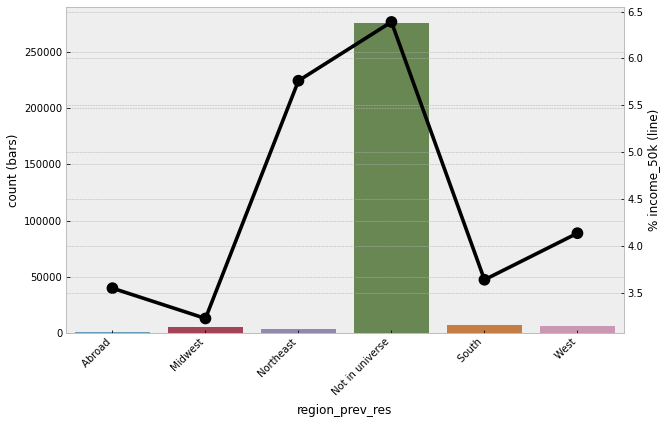

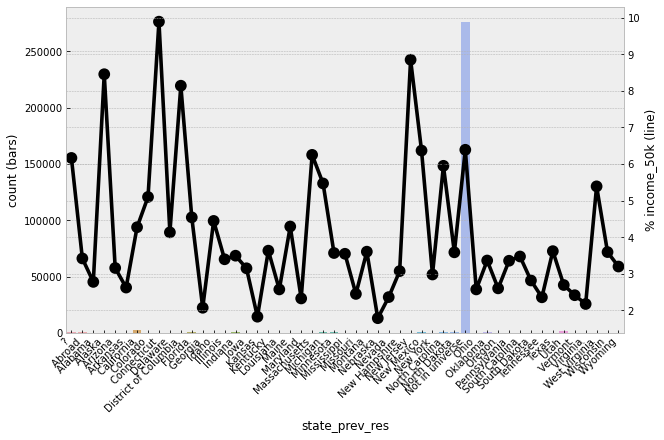

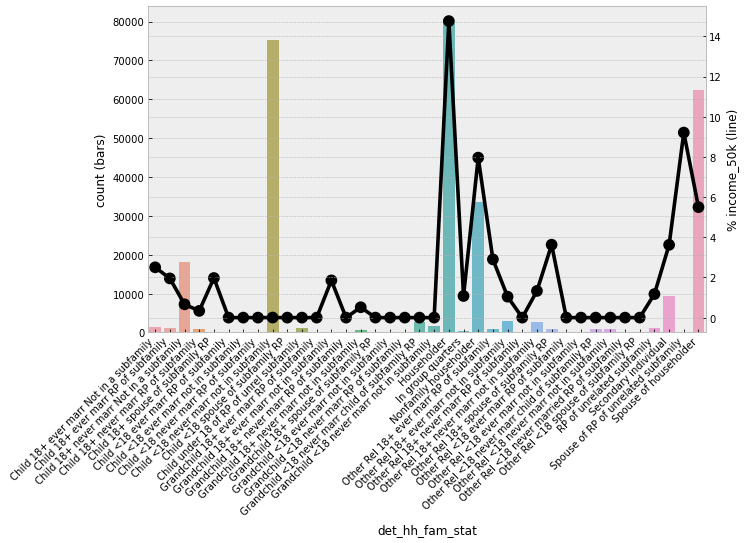

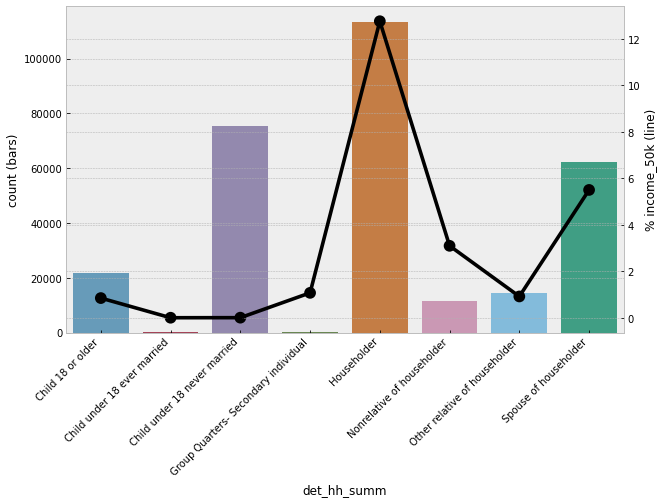

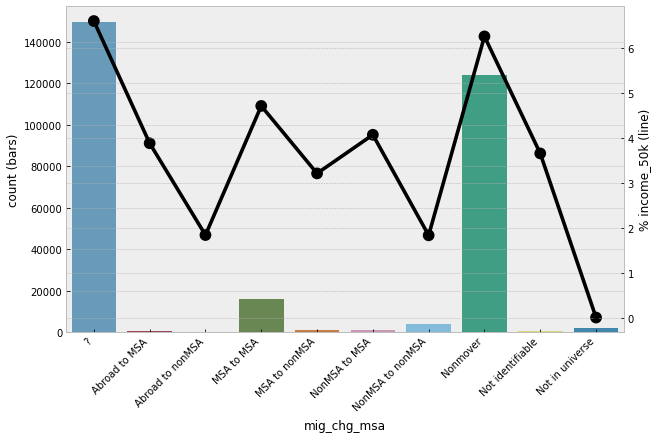

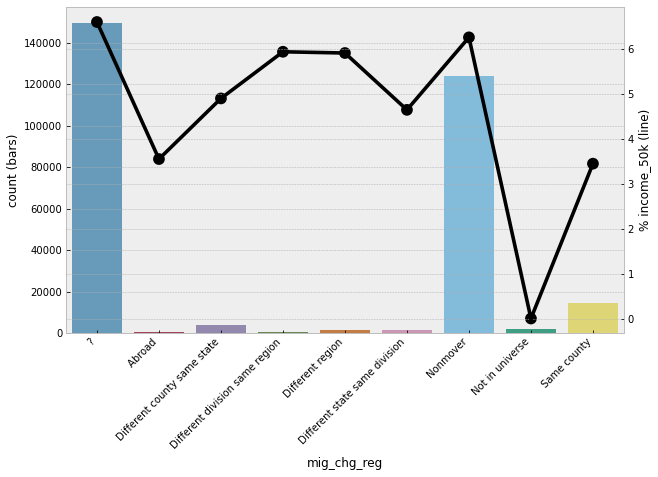

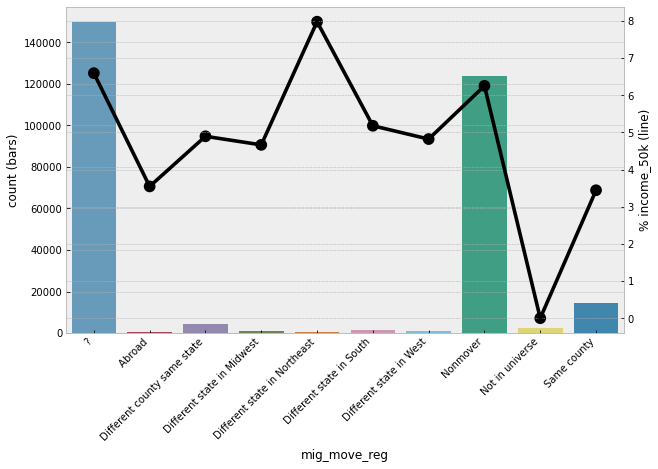

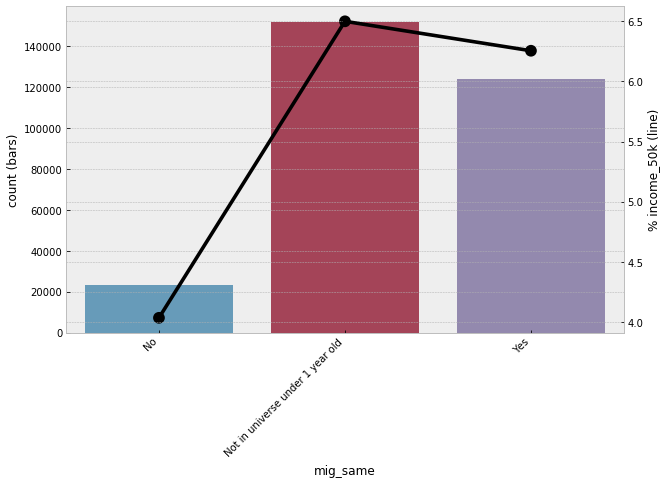

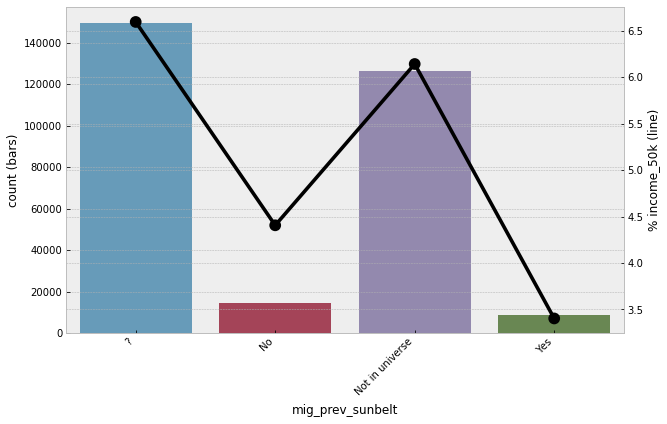

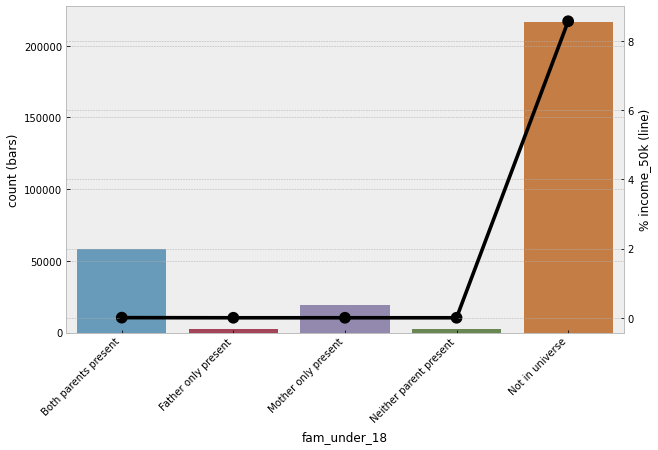

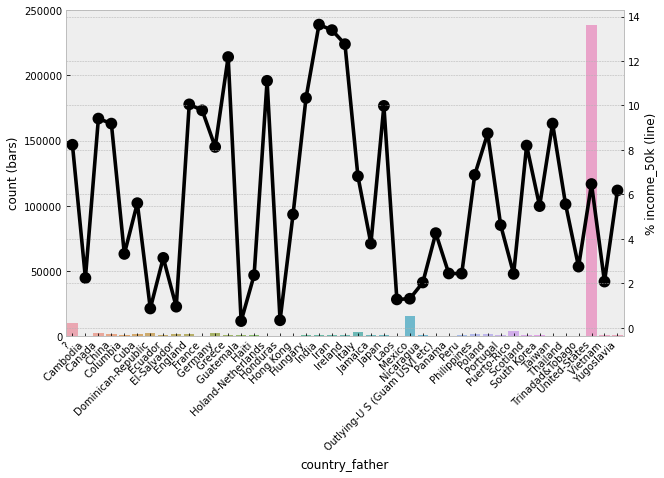

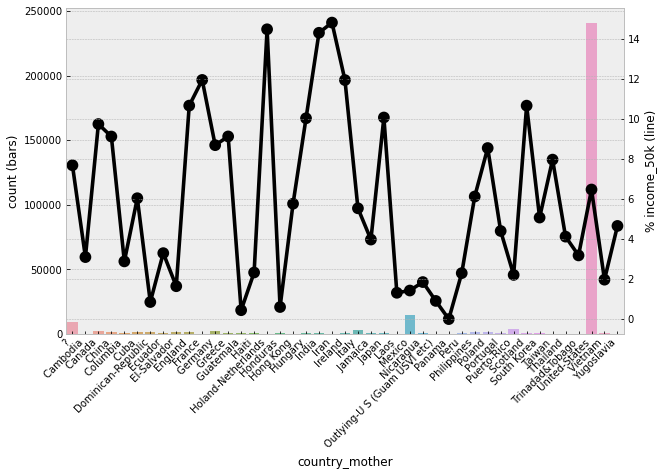

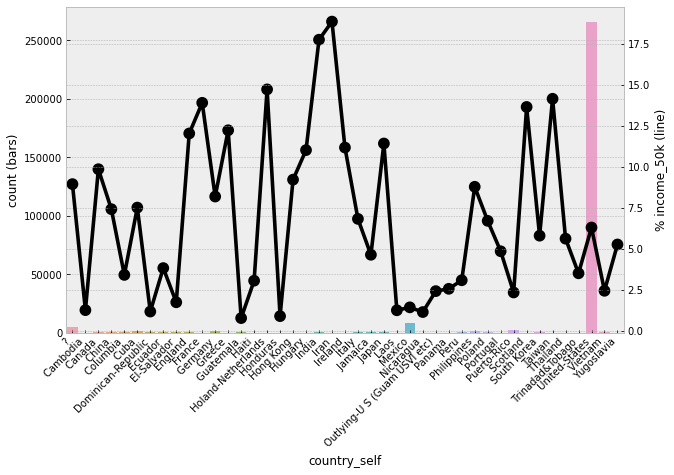

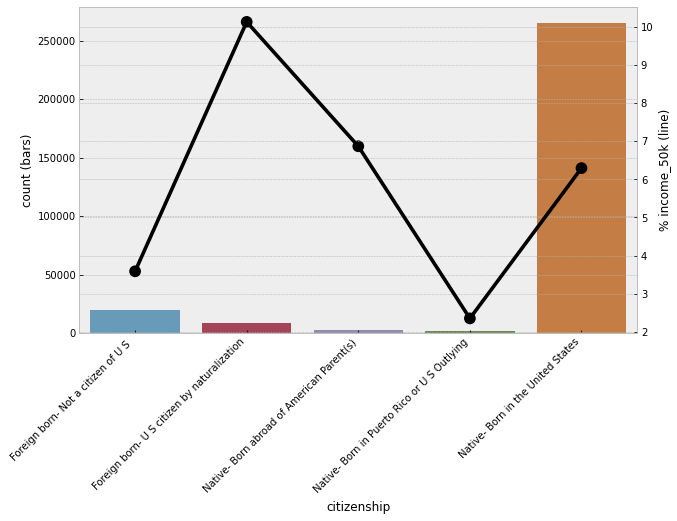

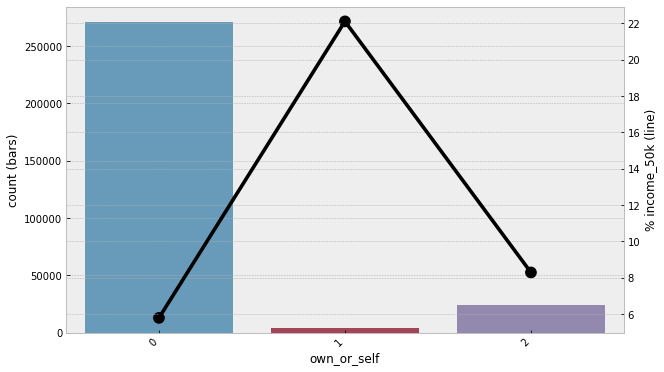

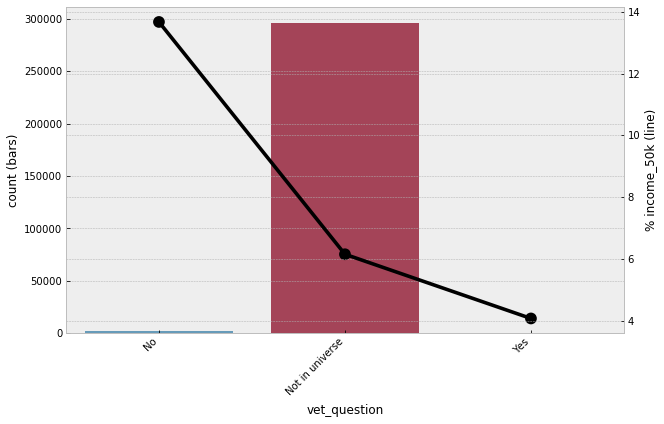

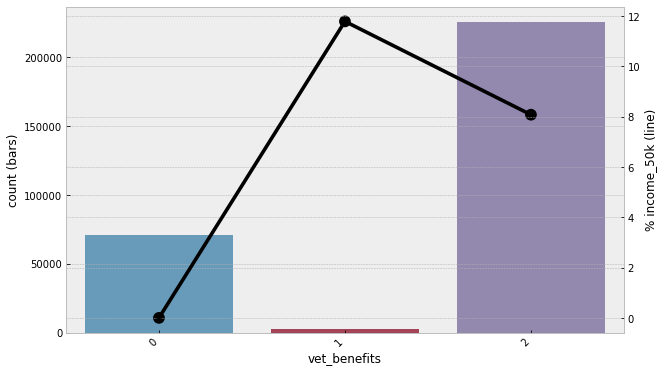

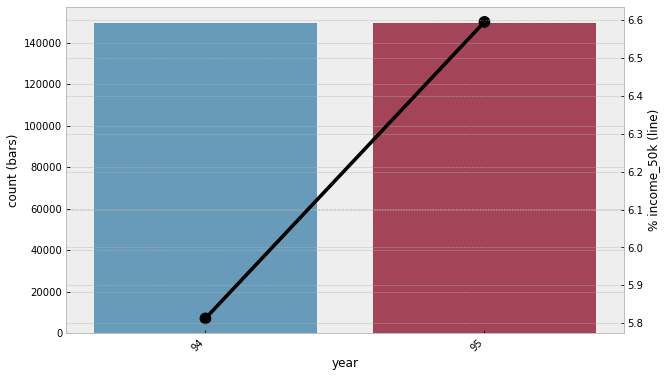

In [8]:
## just plot all the categoricals to explore and do one at a time later
feat_count = len(categorical_features)
plt.figure(figsize=(10, 6*feat_count))
for feat in categorical_features:
    categorical_explanitory_binary_response_chart(df, feat, 'income_50k')

<Figure size 720x14256 with 0 Axes>

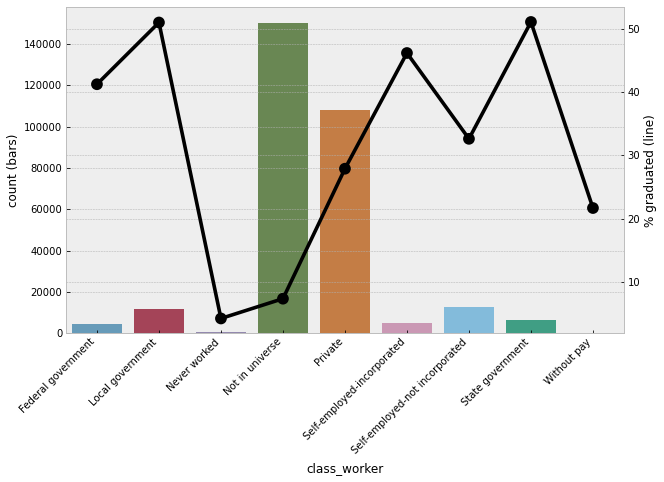

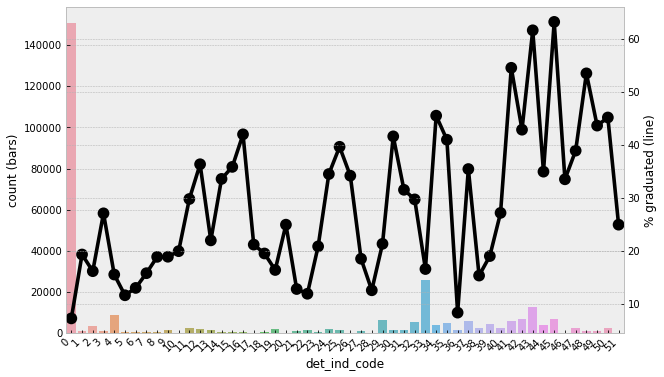

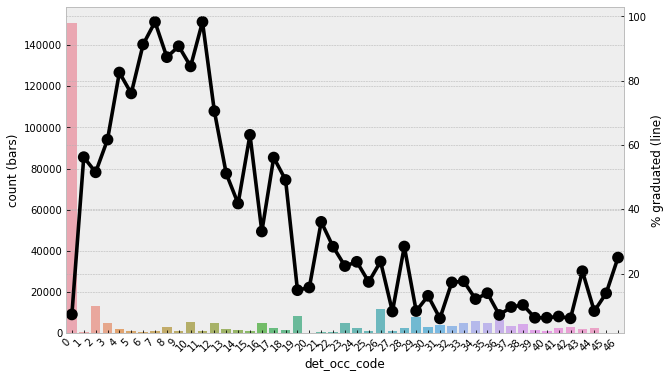

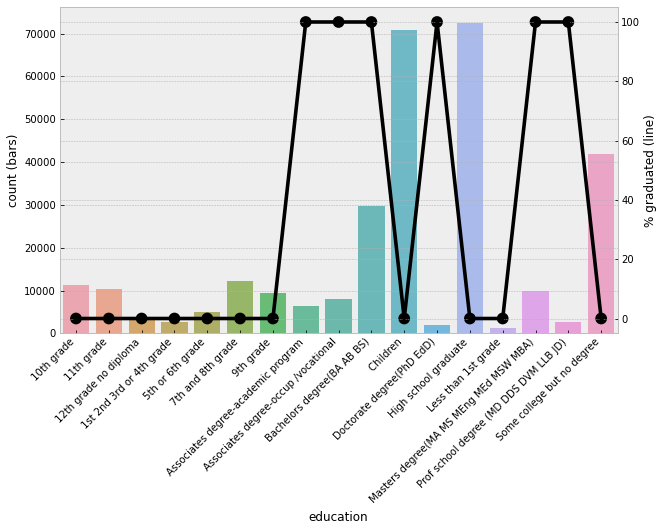

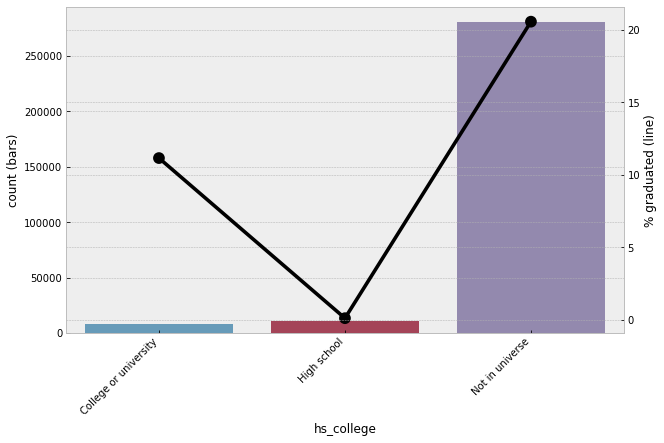

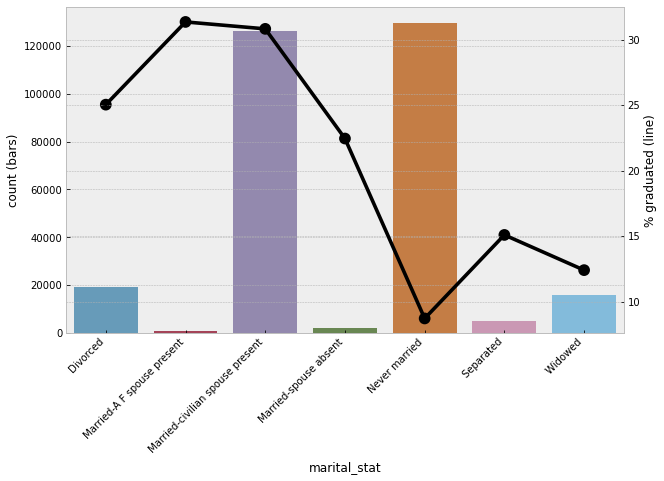

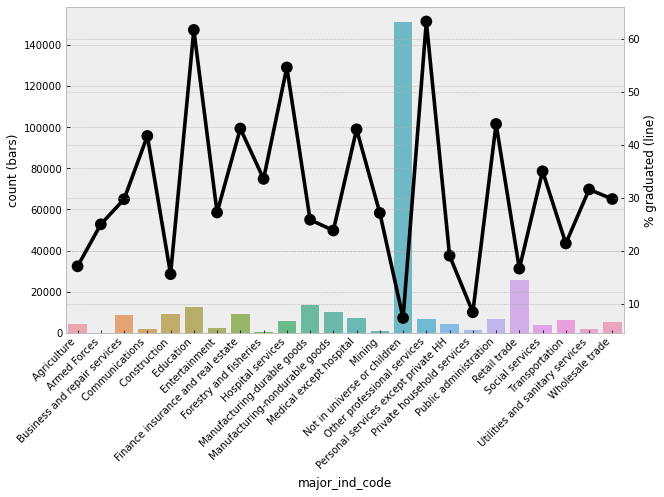

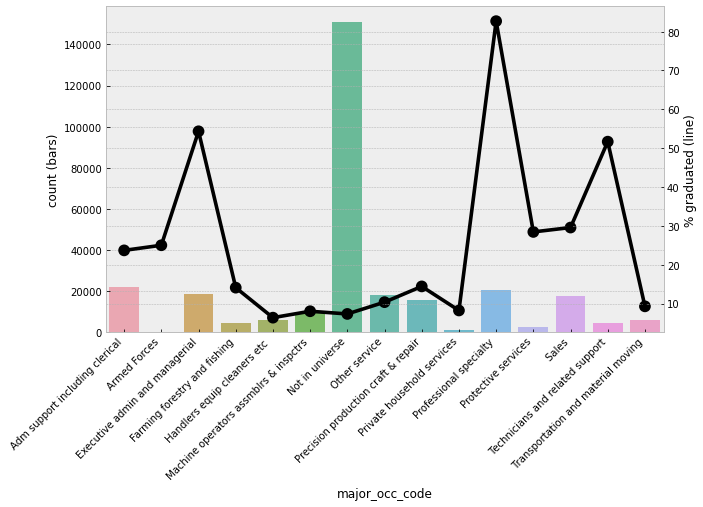

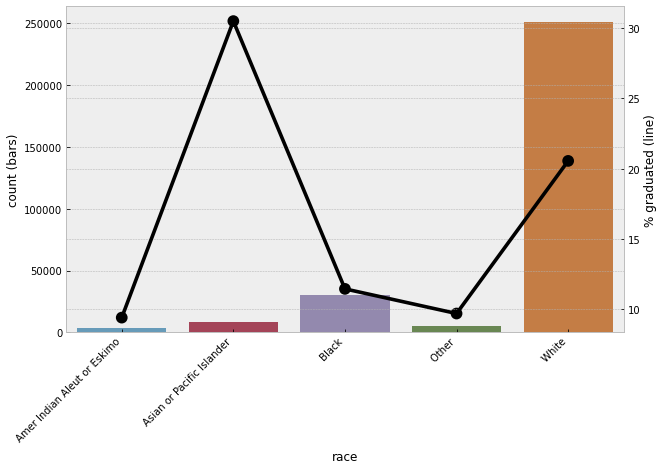

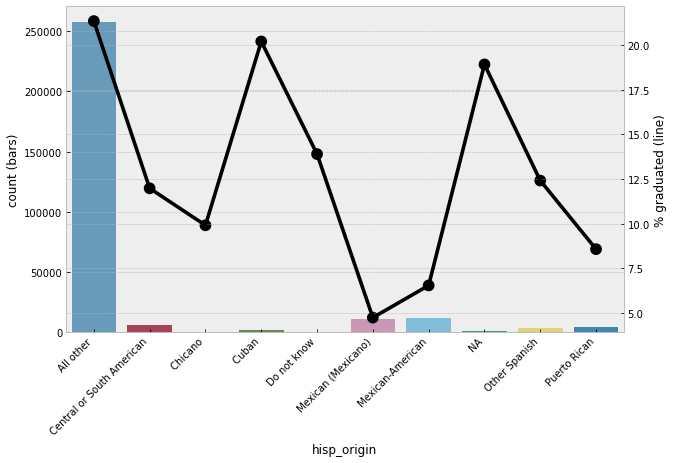

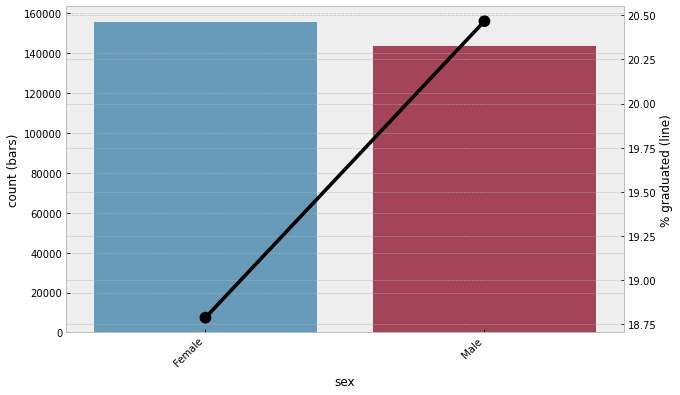

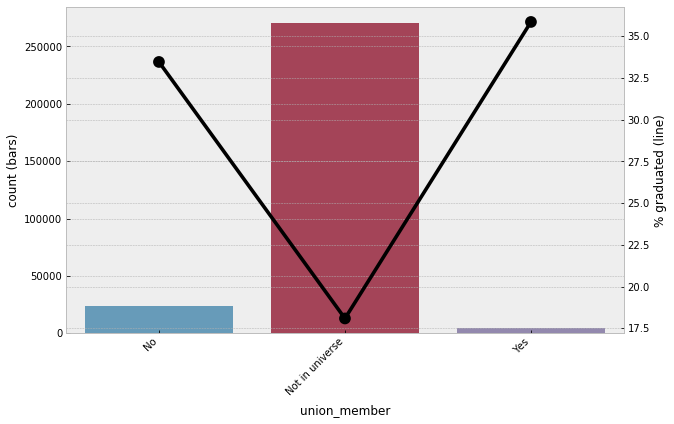

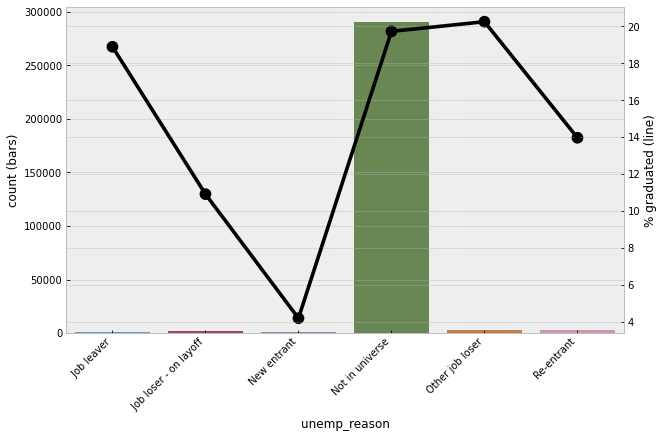

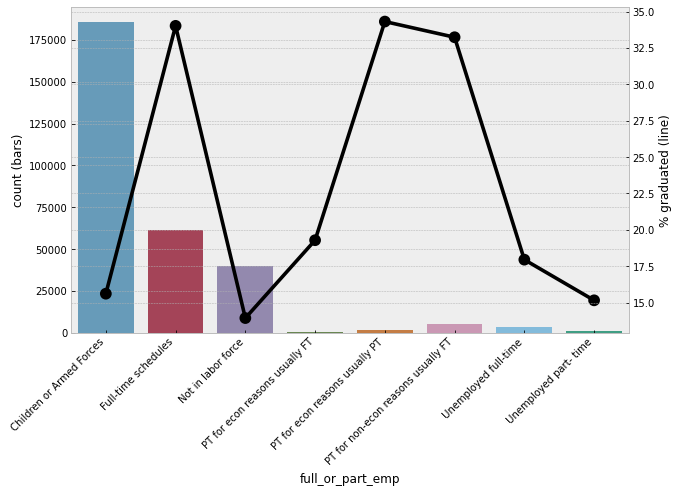

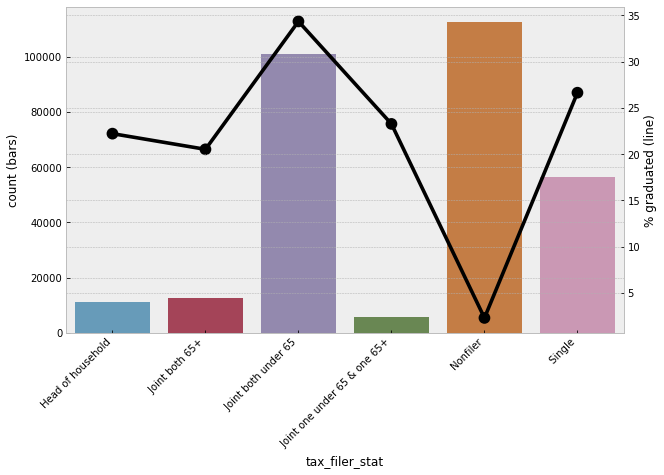

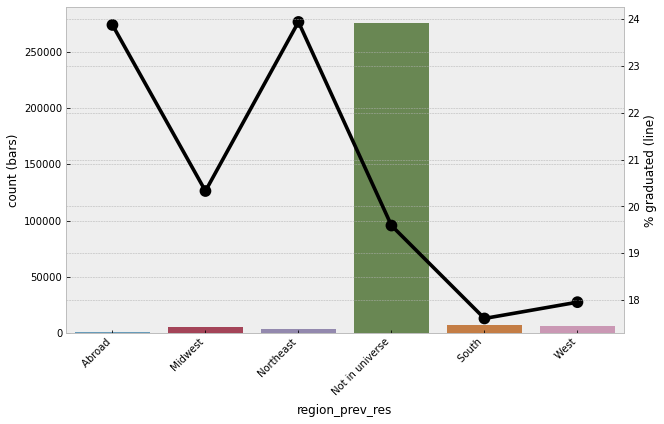

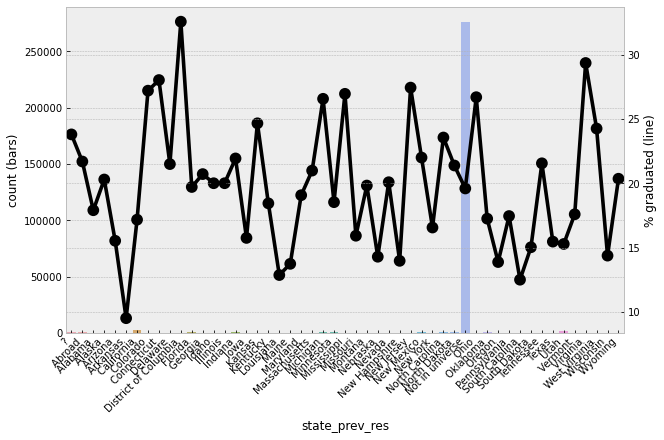

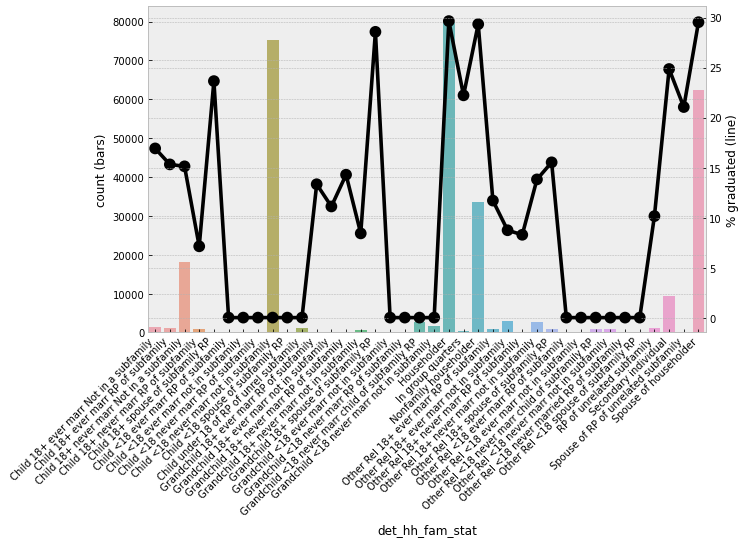

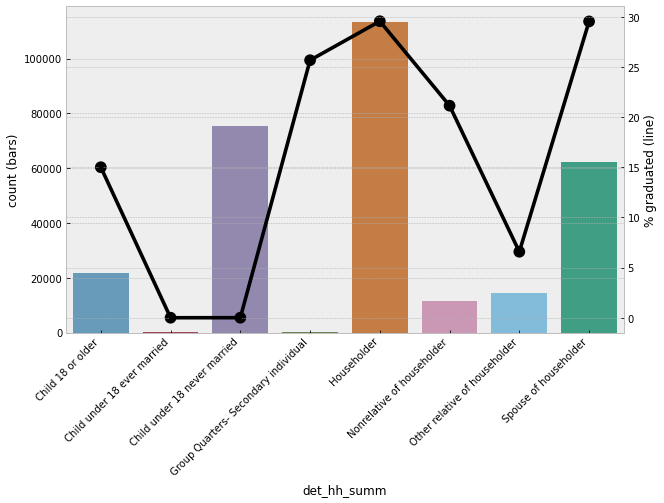

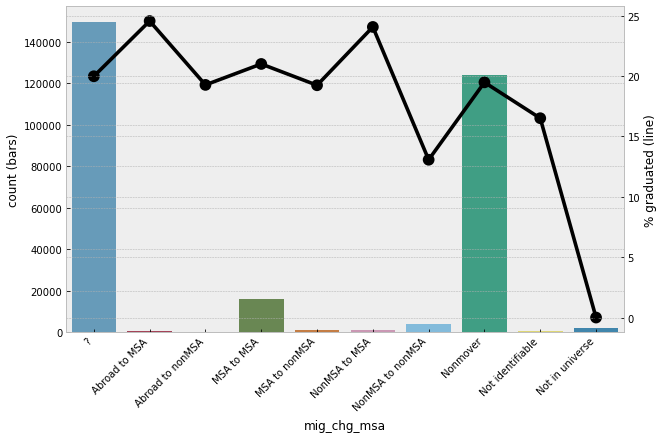

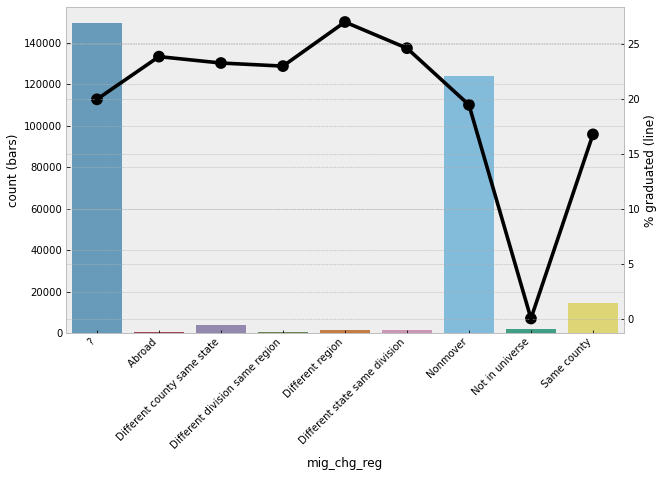

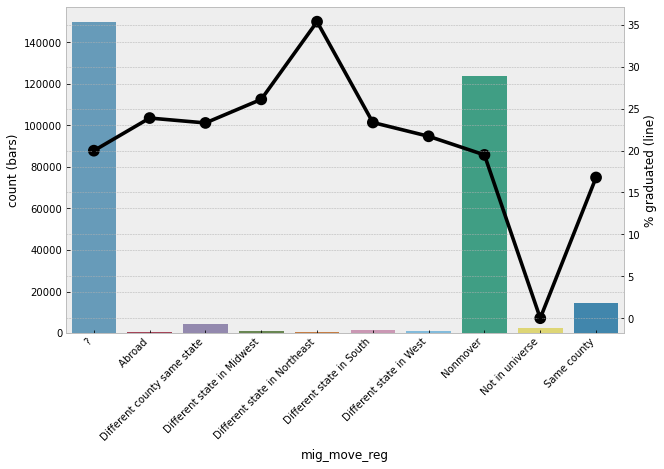

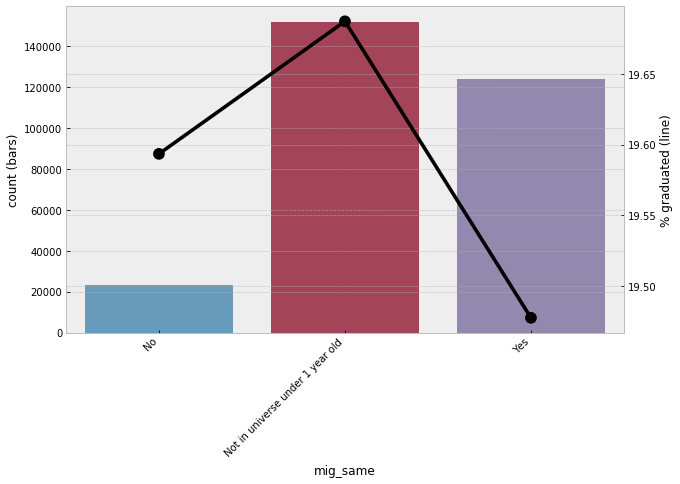

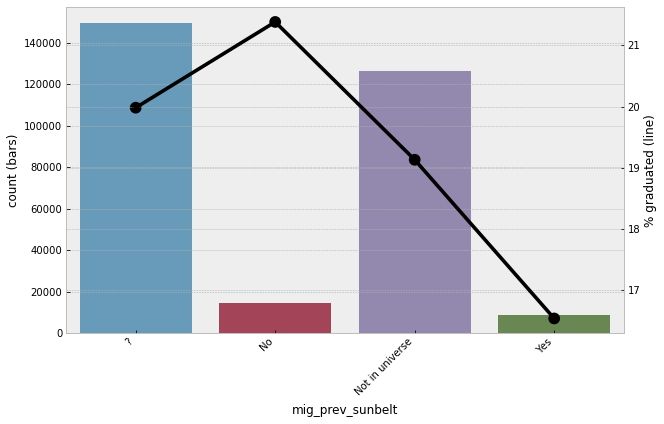

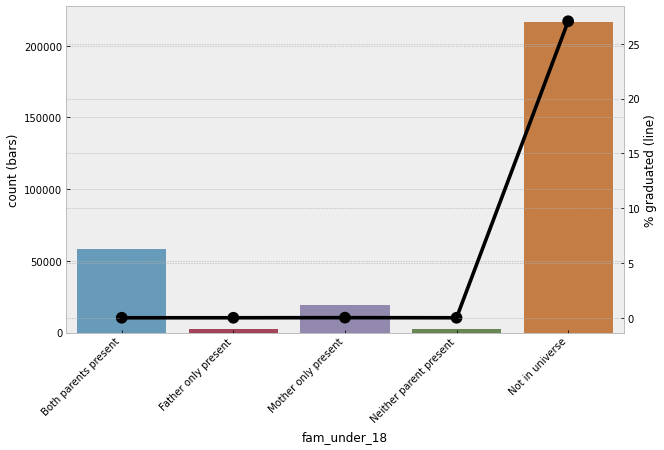

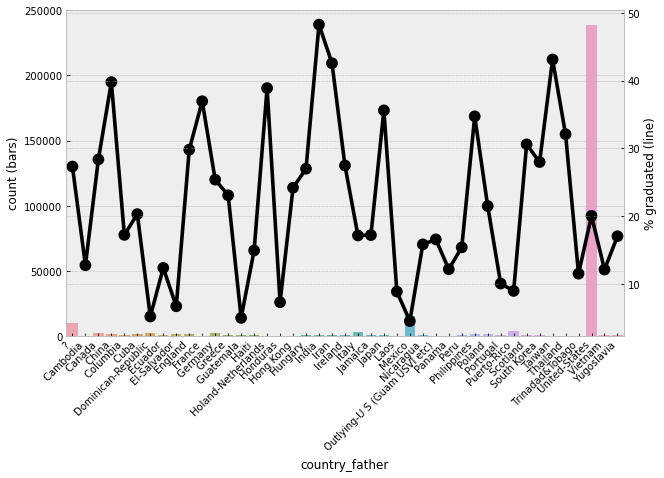

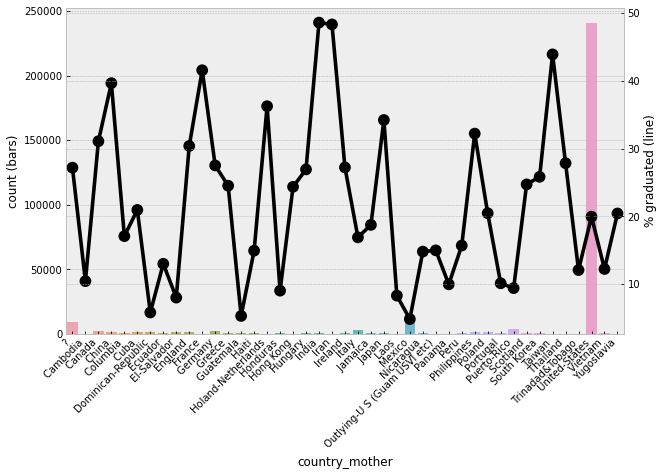

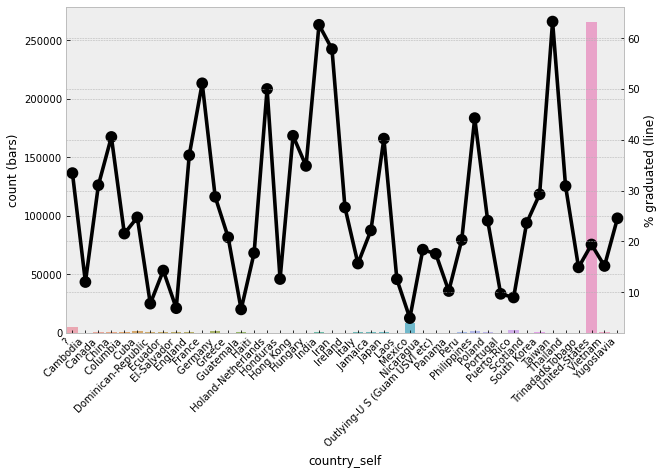

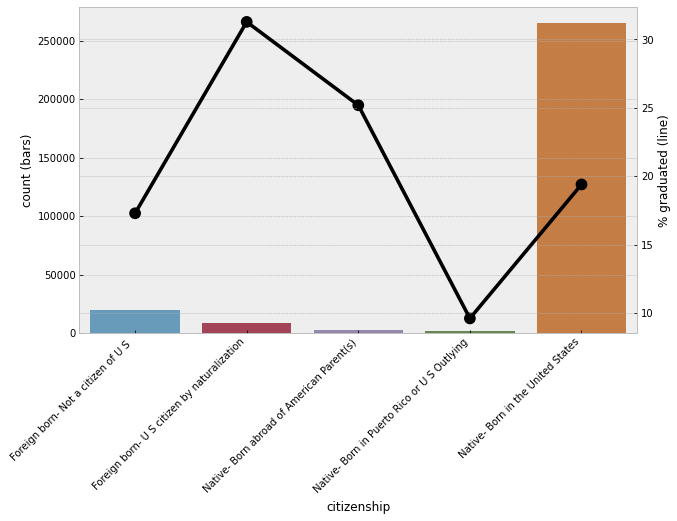

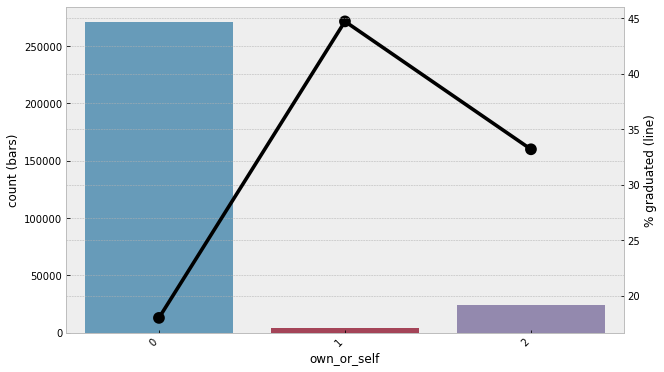

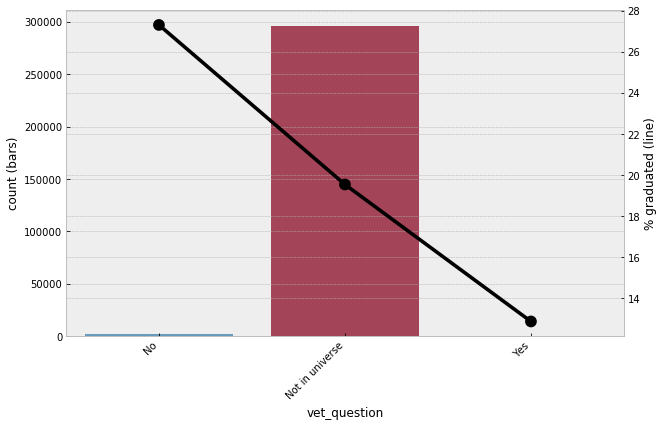

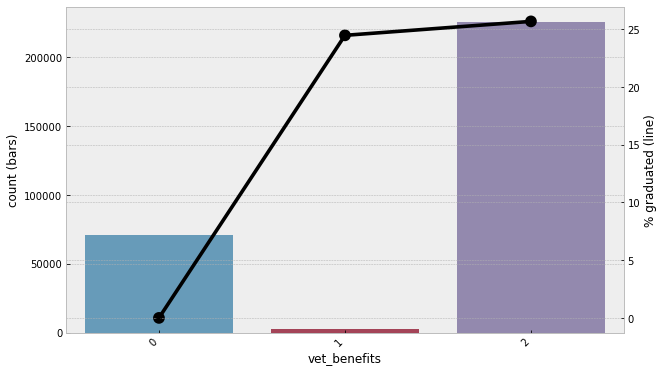

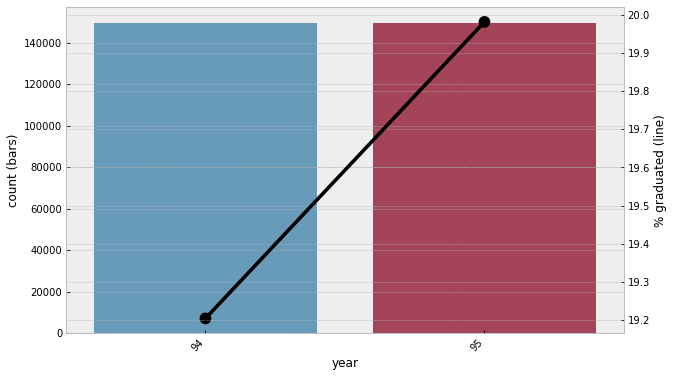

In [73]:
## just plot all the categoricals to explore and do one at a time later
feat_count = len(categorical_features)
plt.figure(figsize=(10, 6*feat_count))
for feat in categorical_features:
    categorical_explanitory_binary_response_chart(df, feat, 'graduated')

                      class_worker    50000+.   count
0                  Not in universe   0.897395  150324
1                          Private  10.183258  108099
2   Self-employed-not incorporated  12.730845   12725
3                 Local government  11.061376   11617
4                 State government  11.698467    6394
5       Self-employed-incorporated  34.256055    4913
6               Federal government  20.115473    4330
7                     Never worked   0.311042     643
8                      Without pay   0.833333     240


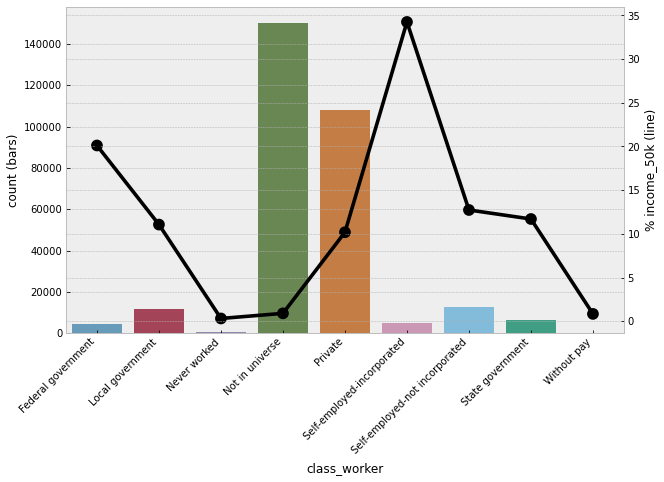

In [77]:
categorical_explanitory_binary_response_chart(df, 'class_worker', 'income_50k')

                      class_worker        yes   count
0                  Not in universe   7.329502  150324
1                          Private  27.885549  108099
2   Self-employed-not incorporated  32.612967   12725
3                 Local government  51.011449   11617
4                 State government  51.094776    6394
5       Self-employed-incorporated  46.183595    4913
6               Federal government  41.247113    4330
7                     Never worked   4.199067     643
8                      Without pay  21.666667     240


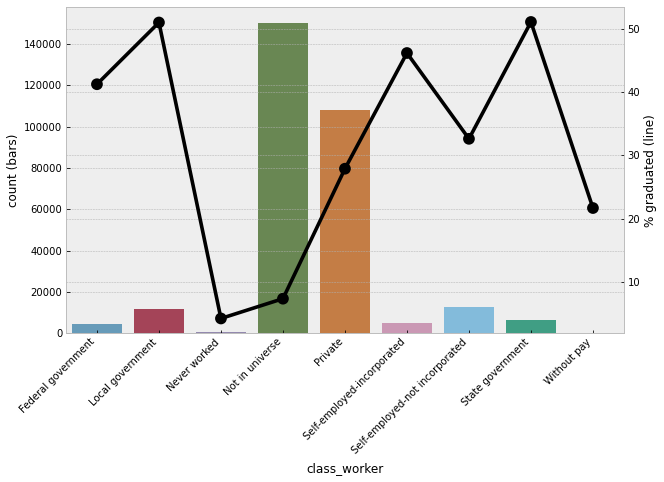

In [78]:
categorical_explanitory_binary_response_chart(df, 'class_worker', 'graduated')

   det_occ_code        yes   count
0             0   7.316168  150967
1             2  51.517694   13112
2            26  23.775746   11701
3            19  14.858260    8184
4            29   8.371914    7776
5            36   7.149727    6238
6            34  12.088639    6047
7            10  84.441610    5489
8            16  33.101986    5187
9            12  70.534472    5033
10           33  17.643553    5033
11           23  22.359260    5027
12            3  61.657390    4851
13           35  13.919032    4792
14           38  10.258658    4562
15           31   6.085890    4075
16           32  17.284639    3587
17           37   9.618275    3327
18            8  87.314610    3169
19           42   6.109551    2848
20           30  13.107822    2838
21           24  23.677490    2741
22           17  56.095737    2674
23           28  28.431373    2448
24           41   6.677796    2396
25           44   8.350907    2371
26            4  82.542787    2045
27           43  20.

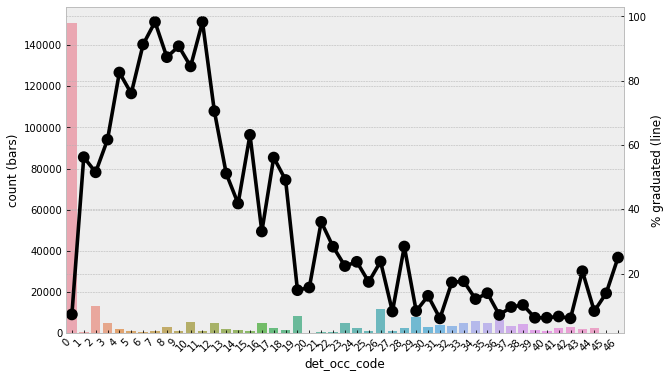

In [79]:
categorical_explanitory_binary_response_chart(df, 'det_occ_code', 'graduated')

   det_occ_code    50000+.   count
0             0   0.894898  150967
1             2  32.191885   13112
2            26   2.521152   11701
3            19   2.529326    8184
4            29   0.630144    7776
5            36   3.510741    6238
6            34   7.540929    6047
7            10  10.439060    5489
8            16  17.100443    5187
9            12  13.431353    5033
10           33  10.749056    5033
11           23   1.710762    5027
12            3  20.263863    4851
13           35   9.641068    4792
14           38   5.940377    4562
15           31   1.177914    4075
16           32   1.589072    3587
17           37   3.787196    3327
18            8  17.292521    3169
19           42   1.544944    2848
20           30   1.338971    2838
21           24   2.079533    2741
22           17  26.252805    2674
23           28  15.522876    2448
24           41   1.502504    2396
25           44   1.391818    2371
26            4  49.046455    2045
27           43   8.

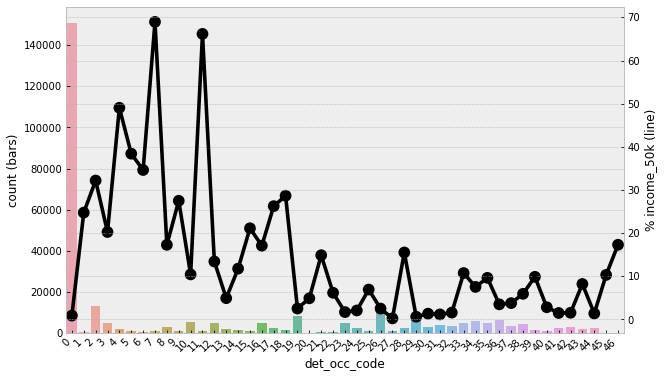

In [80]:
categorical_explanitory_binary_response_chart(df, 'det_occ_code', 'income_50k')

                                  education    50000+.  count
0                      High school graduate   3.959809  72554
1                                  Children   0.000000  70864
2                Some college but no degree   6.293388  41774
3                Bachelors degree(BA AB BS)  19.754622  29750
4                         7th and 8th grade   0.863771  12156
5                                10th grade   0.844327  11370
6                                11th grade   1.115492  10399
7    Masters degree(MA MS MEng MEd MSW MBA)  31.217630   9847
8                                 9th grade   0.642742   9335
9       Associates degree-occup /vocational   7.654076   8048
10       Associates degree-academic program   9.174170   6442
11                         5th or 6th grade   0.801443   4991
12                    12th grade no diploma   1.471039   3263
13                 1st 2nd 3rd or 4th grade   0.739372   2705
14   Prof school degree (MD DDS DVM LLB JD)  54.215062   2669
15      

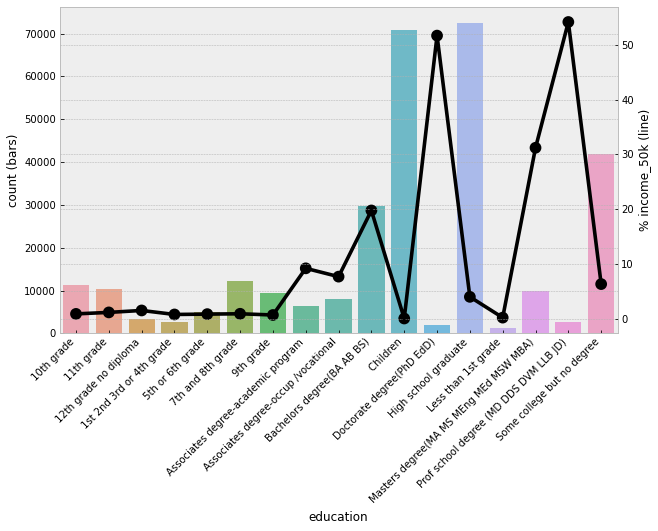

In [81]:
categorical_explanitory_binary_response_chart(df, 'education', 'income_50k')

                  tax_filer_stat    50000+.   count
0                       Nonfiler   0.044459  112462
1            Joint both under 65  13.188054  100955
2                         Single   6.058777   56315
3                 Joint both 65+   5.237107   12526
4              Head of household   5.919700   11183
5   Joint one under 65 & one 65+   8.110883    5844


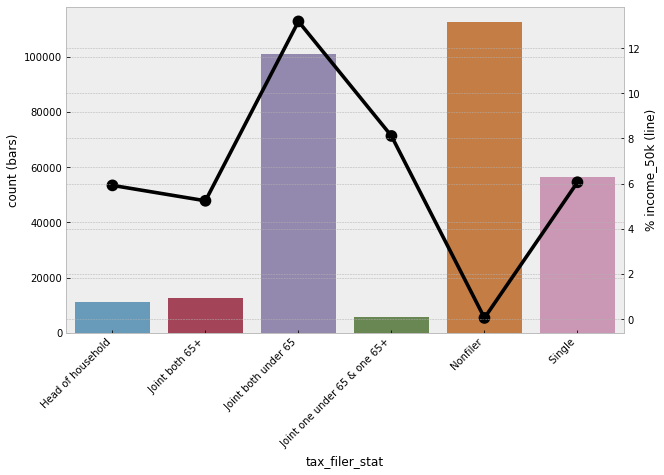

In [82]:
categorical_explanitory_binary_response_chart(df, 'tax_filer_stat', 'income_50k')

                      full_or_part_emp    50000+.   count
0             Children or Armed Forces   4.719102  185459
1                  Full-time schedules  13.205235   61203
2                   Not in labor force   1.765247   40221
3   PT for non-econ reasons usually FT  11.706545    5057
4                 Unemployed full-time   3.583618    3516
5       PT for econ reasons usually PT  13.058036    1792
6                Unemployed part- time   2.392344    1254
7       PT for econ reasons usually FT   5.363985     783


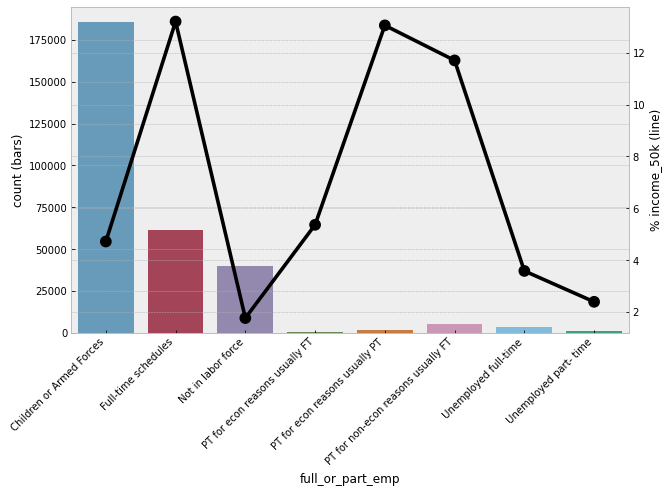

In [83]:
categorical_explanitory_binary_response_chart(df, 'full_or_part_emp', 'income_50k')

<AxesSubplot:>

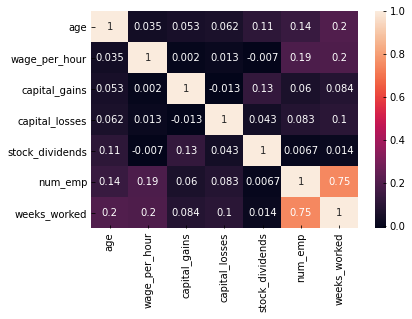

In [124]:
df_cont = df[continuous_features]
sns.heatmap(df_cont.corr(), annot = True)

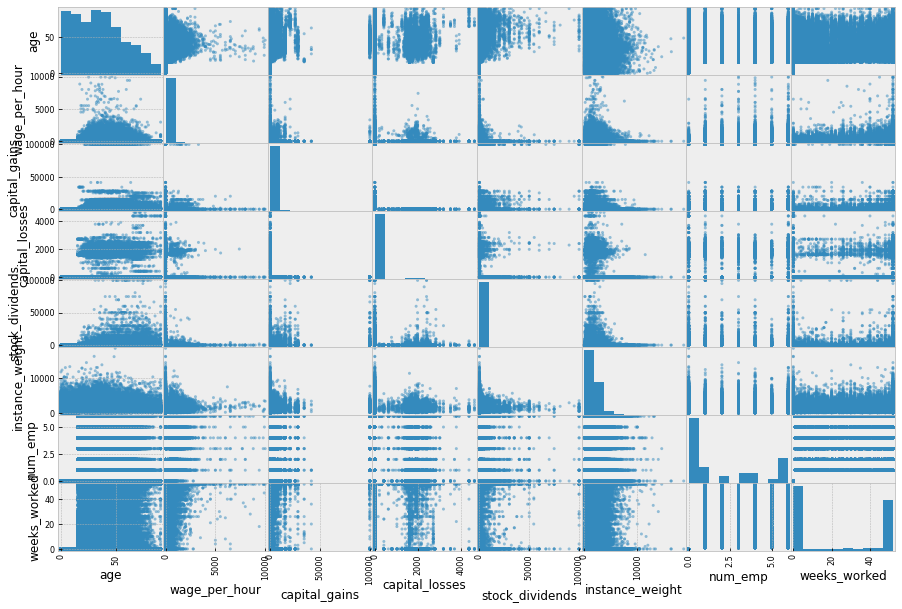

In [26]:
ax = scatter_matrix(df, figsize = (15,10))

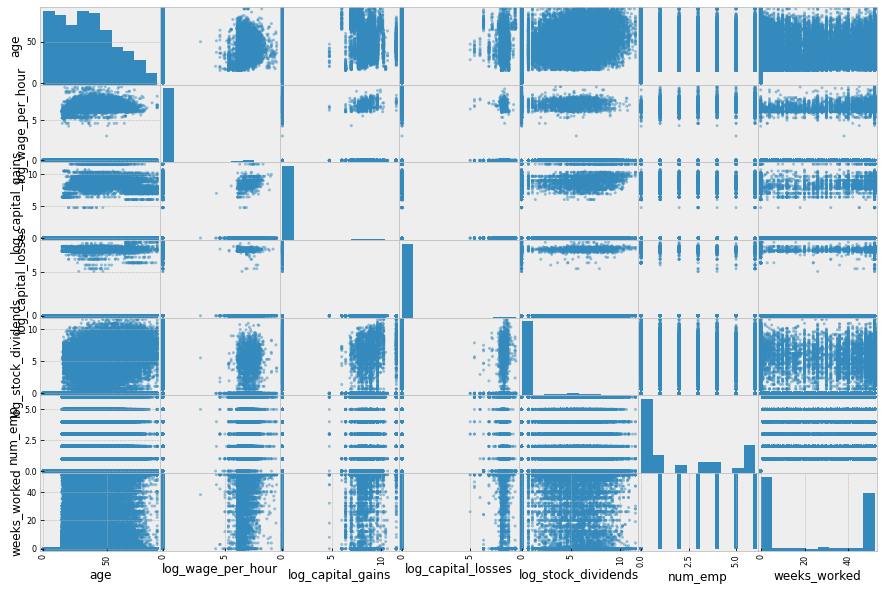

In [88]:
ax = scatter_matrix(df[log_continuous_features], figsize = (15,10))

<AxesSubplot:xlabel='capital_gains', ylabel='age'>

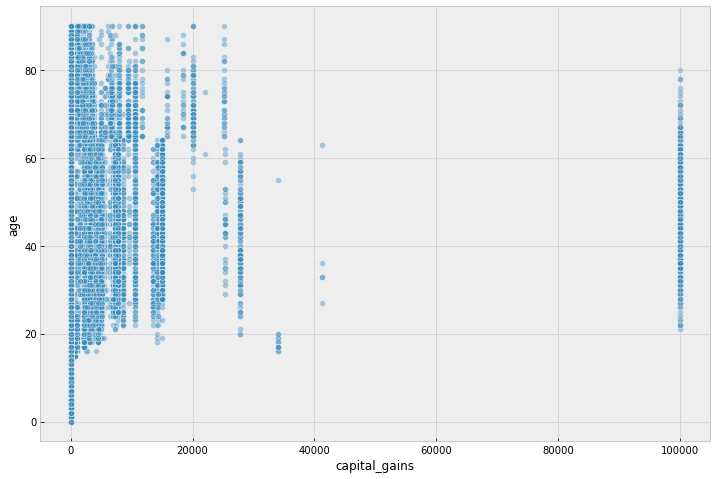

In [99]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x="capital_gains", y="age", alpha=.4)

<AxesSubplot:xlabel='capital_losses', ylabel='age'>

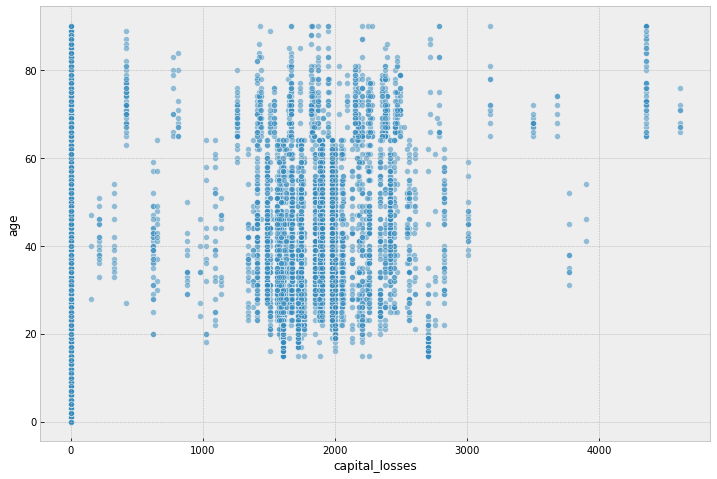

In [96]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x="capital_losses", y="age", alpha=.5)

/opt/anaconda3/envs/msds_rpy37/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/envs/msds_rpy37/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/envs/msds_rpy37/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/envs/msds_rpy37/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/envs/msds_rpy37/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/opt/anaco

/opt/anaconda3/envs/msds_rpy37/lib/python3.7/site-packages/matplotlib/contour.py:1494: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/opt/anaconda3/envs/msds_rpy37/lib/python3.7/site-packages/matplotlib/contour.py:1495: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
/opt/anaconda3/envs/msds_rpy37/lib/python3.7/site-packages/seaborn/distributions.py:434: UserWarning: No contour levels were found within the data range.
  cset = contour_func(xx, yy, z, n_levels, **kwargs)
/opt/anaconda3/envs/msds_rpy37/lib/python3.7/site-packages/statsmodels/nonparametric/kernels.py:125: RuntimeWarning: divide by zero encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
/opt/anaconda3/envs/msds_rpy37/lib/python3.7/site-packages/statsmodels/nonparametric/kernels.py:125: RuntimeWarning: invalid value encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2

/opt/anaconda3/envs/msds_rpy37/lib/python3.7/site-packages/matplotlib/contour.py:1494: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/opt/anaconda3/envs/msds_rpy37/lib/python3.7/site-packages/matplotlib/contour.py:1495: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
/opt/anaconda3/envs/msds_rpy37/lib/python3.7/site-packages/seaborn/distributions.py:434: UserWarning: No contour levels were found within the data range.
  cset = contour_func(xx, yy, z, n_levels, **kwargs)
/opt/anaconda3/envs/msds_rpy37/lib/python3.7/site-packages/statsmodels/nonparametric/kernels.py:125: RuntimeWarning: divide by zero encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
/opt/anaconda3/envs/msds_rpy37/lib/python3.7/site-packages/statsmodels/nonparametric/kernels.py:125: RuntimeWarning: invalid value encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2

/opt/anaconda3/envs/msds_rpy37/lib/python3.7/site-packages/matplotlib/contour.py:1494: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/opt/anaconda3/envs/msds_rpy37/lib/python3.7/site-packages/matplotlib/contour.py:1495: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
/opt/anaconda3/envs/msds_rpy37/lib/python3.7/site-packages/seaborn/distributions.py:434: UserWarning: No contour levels were found within the data range.
  cset = contour_func(xx, yy, z, n_levels, **kwargs)
/opt/anaconda3/envs/msds_rpy37/lib/python3.7/site-packages/statsmodels/nonparametric/kernels.py:125: RuntimeWarning: divide by zero encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
/opt/anaconda3/envs/msds_rpy37/lib/python3.7/site-packages/statsmodels/nonparametric/kernels.py:125: RuntimeWarning: invalid value encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2

/opt/anaconda3/envs/msds_rpy37/lib/python3.7/site-packages/matplotlib/contour.py:1494: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/opt/anaconda3/envs/msds_rpy37/lib/python3.7/site-packages/matplotlib/contour.py:1495: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
/opt/anaconda3/envs/msds_rpy37/lib/python3.7/site-packages/seaborn/distributions.py:434: UserWarning: No contour levels were found within the data range.
  cset = contour_func(xx, yy, z, n_levels, **kwargs)
/opt/anaconda3/envs/msds_rpy37/lib/python3.7/site-packages/statsmodels/nonparametric/kernels.py:125: RuntimeWarning: divide by zero encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
/opt/anaconda3/envs/msds_rpy37/lib/python3.7/site-packages/statsmodels/nonparametric/kernels.py:125: RuntimeWarning: invalid value encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2

<Figure size 2160x2160 with 0 Axes>

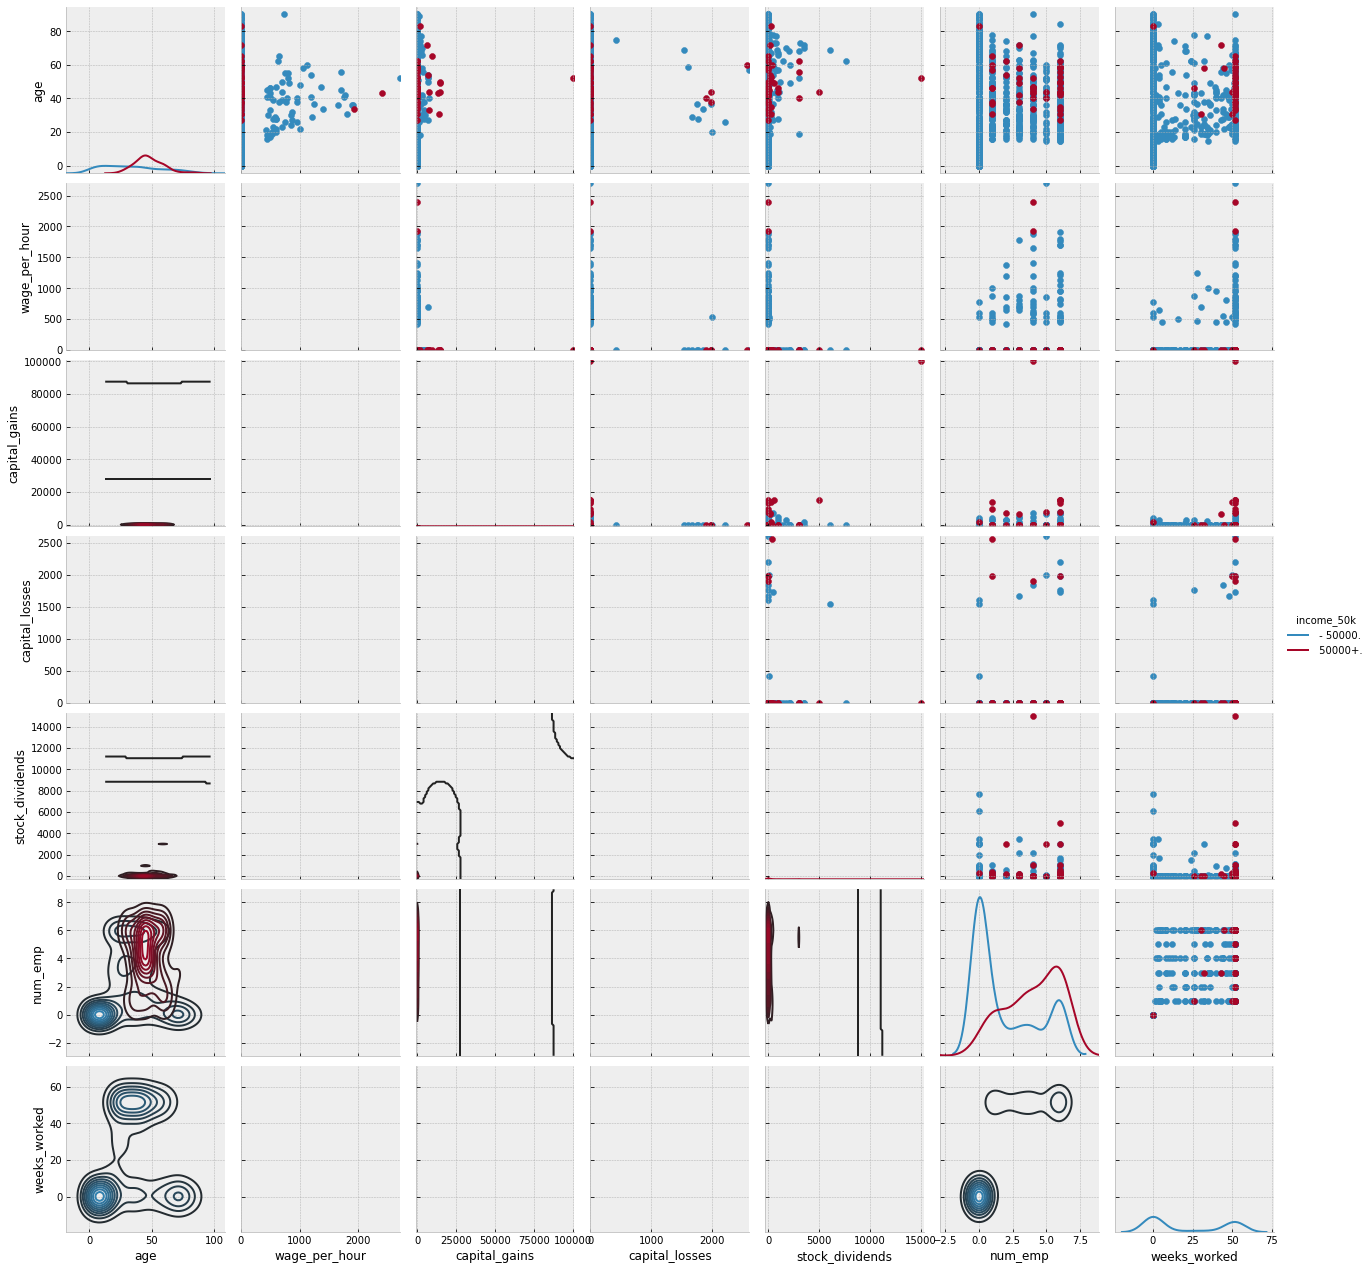

In [20]:
df_sample = df[[*continuous_features, 'income_50k']].sample(n = 1000)

plt.figure(figsize=(30, 30))
g = sns.PairGrid(df_sample, hue='income_50k')
g.map_diag(sns.kdeplot)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)
g.add_legend();

<AxesSubplot:xlabel='age'>

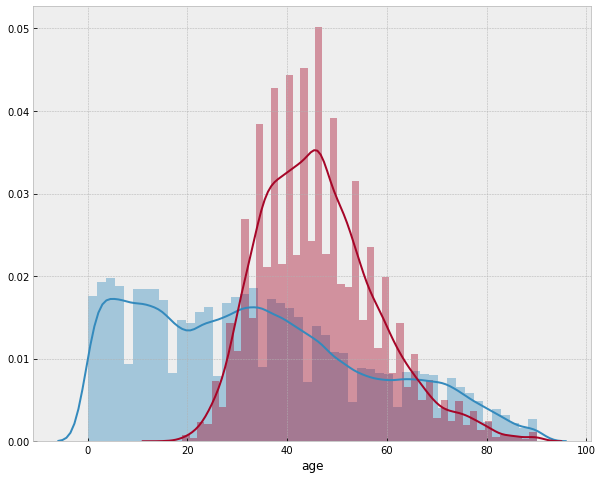

In [21]:
## Overlapping densities
plt.figure(figsize=(10, 8))
sns.distplot(df.loc[df['income_50k'] == ' - 50000.']['age'])
sns.distplot(df.loc[df['income_50k'] != ' - 50000.']['age'])

<AxesSubplot:xlabel='age'>

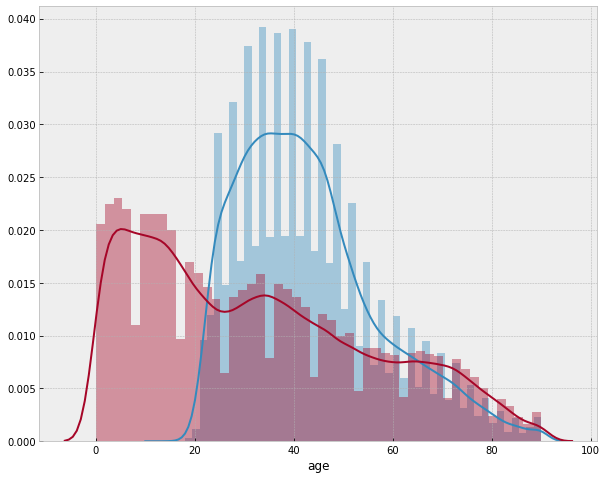

In [69]:
## Overlapping densities
plt.figure(figsize=(10, 8))
sns.distplot(df.loc[df['graduated'] == 'yes']['age'])
sns.distplot(df.loc[df['graduated'] != 'yes']['age'])

<AxesSubplot:xlabel='num_emp'>

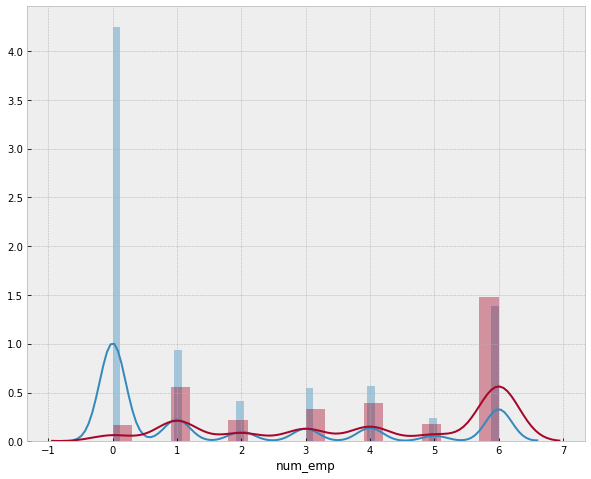

In [22]:
## Overlapping densities
plt.figure(figsize=(10, 8))
sns.distplot(df.loc[df['income_50k'] == ' - 50000.']['num_emp'])
sns.distplot(df.loc[df['income_50k'] != ' - 50000.']['num_emp'])

/opt/anaconda3/envs/msds_rpy37/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/envs/msds_rpy37/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='log_wage_per_hour'>

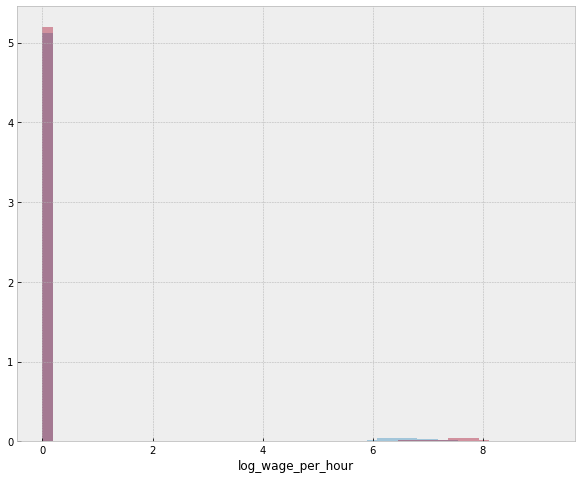

In [121]:
## Overlapping densities
plt.figure(figsize=(10, 8))
sns.distplot(df.loc[df['income_50k'] == ' - 50000.']['log_wage_per_hour'])
sns.distplot(df.loc[df['income_50k'] != ' - 50000.']['log_wage_per_hour'])

/opt/anaconda3/envs/msds_rpy37/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='weeks_worked'>

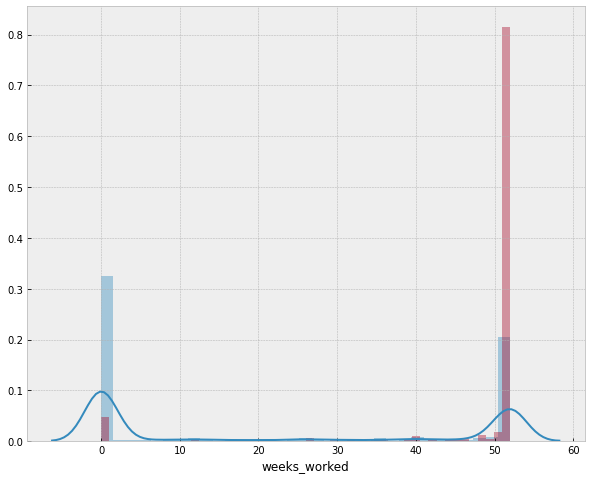

In [23]:
## Overlapping densities
plt.figure(figsize=(10, 8))
sns.distplot(df.loc[df['income_50k'] == ' - 50000.']['weeks_worked'])
sns.distplot(df.loc[df['income_50k'] != ' - 50000.']['weeks_worked'])

/opt/anaconda3/envs/msds_rpy37/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='stock_dividends'>

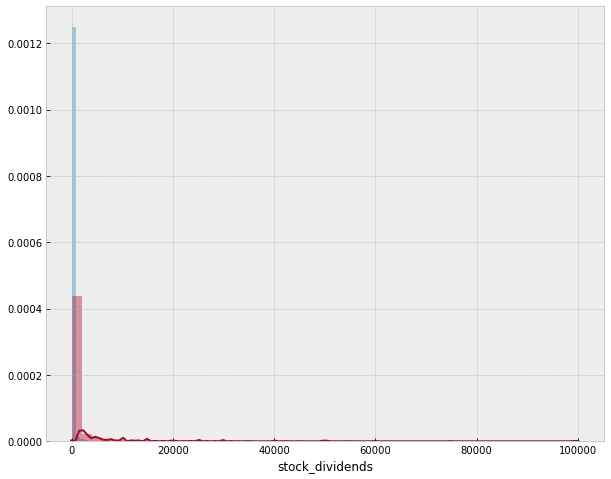

In [24]:
## Overlapping densities
plt.figure(figsize=(10, 8))
sns.distplot(df.loc[df['income_50k'] == ' - 50000.']['stock_dividends'])
sns.distplot(df.loc[df['income_50k'] != ' - 50000.']['stock_dividends'])

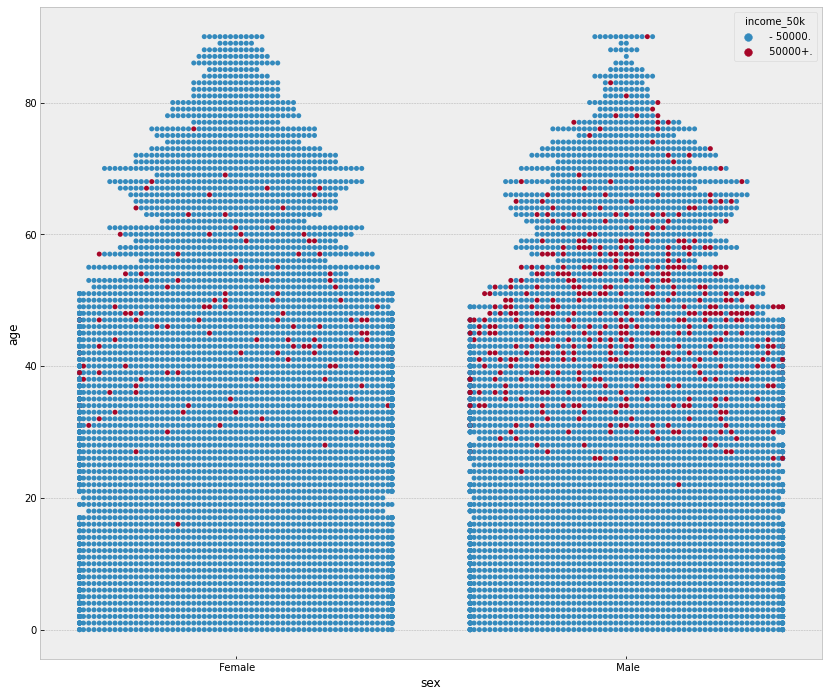

In [25]:
## swarm plot for looking at sample response across a continuous and binary feature

df_sample = df.sample(n = 10000) ## the swarm plot can't handle all the data

plt.figure(figsize=(14, 12))
sns.swarmplot(x = 'sex', y = 'age', hue='income_50k', data = df_sample)
#plt.legend(loc='upper-right')
plt.show()

[Text(0, 0, ' 10th grade'),
 Text(1, 0, ' 11th grade'),
 Text(2, 0, ' 12th grade no diploma'),
 Text(3, 0, ' 1st 2nd 3rd or 4th grade'),
 Text(4, 0, ' 5th or 6th grade'),
 Text(5, 0, ' 7th and 8th grade'),
 Text(6, 0, ' 9th grade'),
 Text(7, 0, ' Associates degree-academic program'),
 Text(8, 0, ' Associates degree-occup /vocational'),
 Text(9, 0, ' Bachelors degree(BA AB BS)'),
 Text(10, 0, ' Children'),
 Text(11, 0, ' Doctorate degree(PhD EdD)'),
 Text(12, 0, ' High school graduate'),
 Text(13, 0, ' Less than 1st grade'),
 Text(14, 0, ' Masters degree(MA MS MEng MEd MSW MBA)'),
 Text(15, 0, ' Prof school degree (MD DDS DVM LLB JD)'),
 Text(16, 0, ' Some college but no degree')]

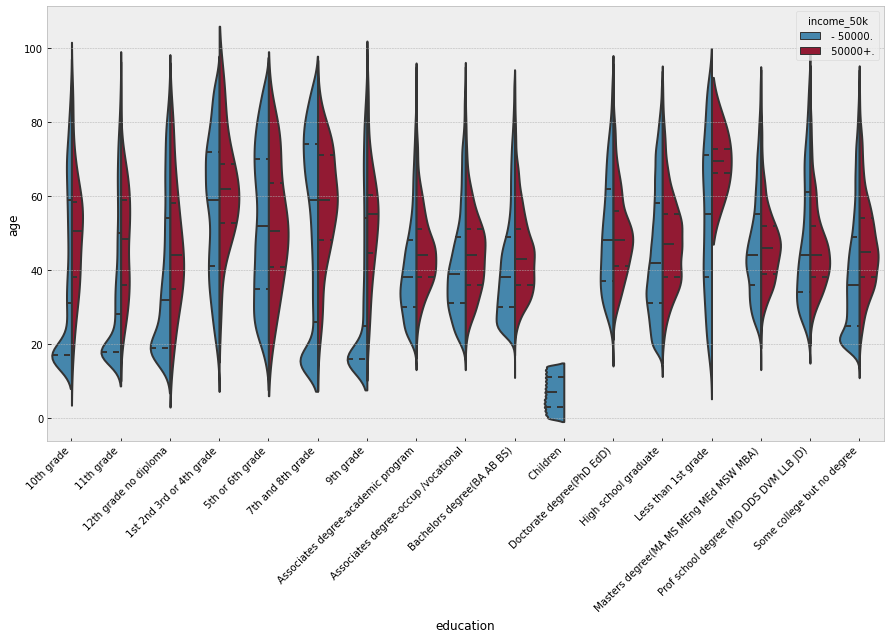

In [29]:
#Violin Plots age
f, ax = plt.subplots(figsize = (15,8))

sns.violinplot(x= 'education', y = 'age', hue = 'income_50k', data = df,
               split = True, inner = 'quart')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')


[Text(0, 0, ' Federal government'),
 Text(1, 0, ' Local government'),
 Text(2, 0, ' Never worked'),
 Text(3, 0, ' Not in universe'),
 Text(4, 0, ' Private'),
 Text(5, 0, ' Self-employed-incorporated'),
 Text(6, 0, ' Self-employed-not incorporated'),
 Text(7, 0, ' State government'),
 Text(8, 0, ' Without pay')]

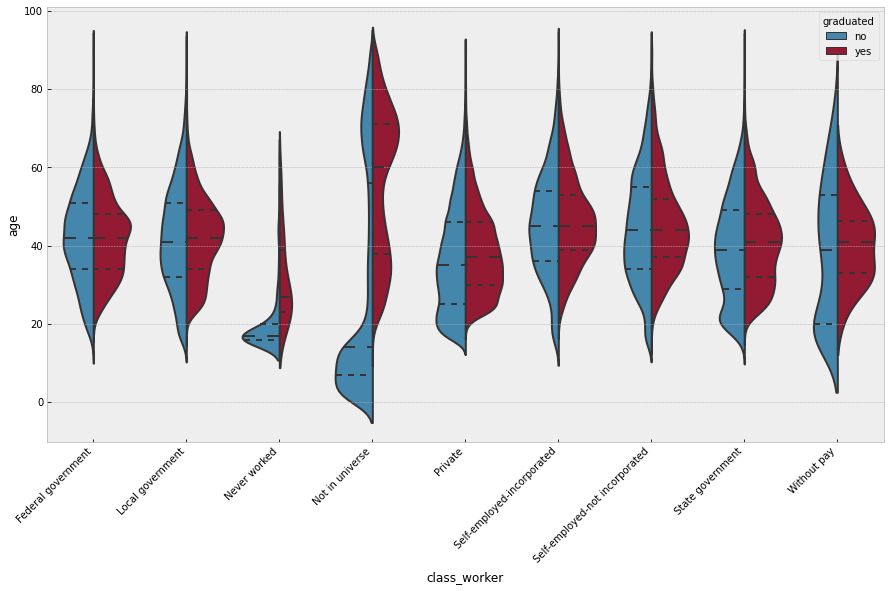

In [122]:
#Violin Plots age
f, ax = plt.subplots(figsize = (15,8))

sns.violinplot(x= 'class_worker', y = 'age', hue = 'graduated', data = df,
               split = True, inner = 'quart')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

[Text(0, 0, ' Federal government'),
 Text(1, 0, ' Local government'),
 Text(2, 0, ' Never worked'),
 Text(3, 0, ' Not in universe'),
 Text(4, 0, ' Private'),
 Text(5, 0, ' Self-employed-incorporated'),
 Text(6, 0, ' Self-employed-not incorporated'),
 Text(7, 0, ' State government'),
 Text(8, 0, ' Without pay')]

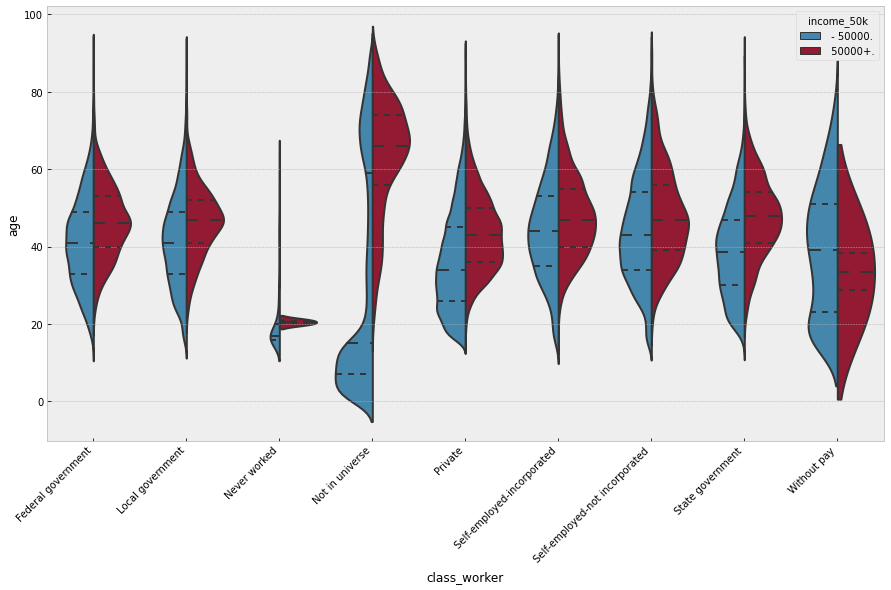

In [123]:
#Violin Plots age
f, ax = plt.subplots(figsize = (15,8))

sns.violinplot(x= 'class_worker', y = 'age', hue = 'income_50k', data = df,
               split = True, inner = 'quart')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

In [70]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def plot_pca(X):
    # Perform PCA on the data to reduce the number of initial features 
    # and to remove correlations that are common between pixel features 
    pca = PCA(n_components=X.shape[1])
    pca.fit(X)

    # Inspect the explained variances to determine how many components to use  
    plt.subplots(figsize=(8, 8))
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance');
    print('Cumulative Explained variance at 200 components:',sum(pca.explained_variance_ratio_[0:199]) )
    


Cumulative Explained variance at 200 components: 1.0


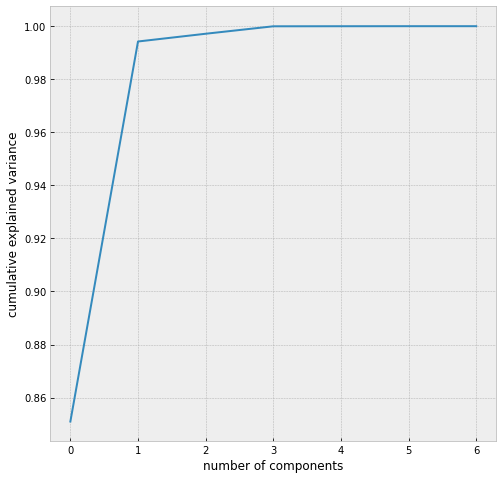

In [72]:
plot_pca(df[continuous_features])